# train 데이터 불러오기

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint


from sklearn.metrics import confusion_matrix

In [2]:
pd.set_option('display.max_colwidth', -1) #원래는 default : 50 만큼만 표시되는데, 전부 표시되게끔 함

/opt/anaconda3/envs/boost0/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


In [3]:
# train 데이터 불러오기
df = pd.read_csv('data/test_with_label.csv')
df.head()

,Unnamed: 0,id,sentence,subject_entity,object_entity,label,source
0,0,0,지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.,"{'word': 'MBC', 'start_idx': 7, 'end_idx': 9, 'type': 'ORG'}","{'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_idx': 21, 'type': 'ORG'}",org:members,wikitree
1,1,1,"사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이란 뜻으로 탄생, 부활, 청춘 등 여러 가지 의미를 담아 생일왕국의 공주님의 이름이 되었다.","{'word': '프린세스 프링', 'start_idx': 7, 'end_idx': 13, 'type': 'PER'}","{'word': '공주', 'start_idx': 84, 'end_idx': 85, 'type': 'POH'}",per:title,wikipedia
2,2,2,"한편, 본인(이근안)을 모델로 한 MBC 특집드라마 가 1995년 6.25 특집극으로 편성될 예정이었는데 제작비 문제 때문에 연출자 고석만 PD(당시 단막극 팀장)가 MBC에 지원을 요청했지만 거절당한 데다 MBC가 경찰과의 관계 약화를 염려하여 제작을 달갑지 않게 여겼고 이 과정에서 연출자가 1995년 3월 29일 MBC에 사표를 제출한 후 프리랜서를 선언하여 편성이 무산됐으며 고석만 PD는 의 제작과 관련한 MBC와의 마찰 외에도 1994년 10월 ""평프로듀서로 일하고 싶다""며 당시 맡고 있던 단막극 책임PD(종합병원 전원일기 등등) 보직 사퇴의사를 밝혔지만 MBC 측의 반대로 무산되자 프리랜서를 선언했다.","{'word': '경찰', 'start_idx': 121, 'end_idx': 122, 'type': 'ORG'}","{'word': '1995년', 'start_idx': 31, 'end_idx': 35, 'type': 'DAT'}",no_relation,wikipedia
3,3,3,"정창손은 김질과 같이 대궐로 달려가 고변하며 '신은 실로 모르고 김질만 혼자 참여하였는데, 김질의 죄는 만번 죽어 마땅합니다.'라고 하니, 세조가 특별히 김질을 사면하였다.","{'word': '세조', 'start_idx': 78, 'end_idx': 79, 'type': 'PER'}","{'word': '정창손', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}",per:colleagues,wikipedia
4,4,4,"당시 민주당 이진련 시의원은 권영진 시장에게 ""긴급 생계자금을 왜 현금으로 지원하지 않느냐""고 따졌다.","{'word': '민주당', 'start_idx': 3, 'end_idx': 5, 'type': 'ORG'}","{'word': '권영진', 'start_idx': 16, 'end_idx': 18, 'type': 'PER'}",no_relation,wikitree


In [4]:
df.loc[df['id'] == 6820,]

,Unnamed: 0,id,sentence,subject_entity,object_entity,label,source
6820,6820,6820,"1875년 시카고 빈민가에 교회를 설립했는데, 구두판매원출신다운 쉽고 설득력있는 무디의 설교와 감성을 자극하는 가수 아이라 생키(1870년 무디의 전도사업에 참여)의 성가는 많은 이들이 신앙을 갖게 했다.","{'word': '시카고', 'start_idx': 6, 'end_idx': 8, 'type': 'LOC'}","{'word': '1875년', 'start_idx': 0, 'end_idx': 4, 'type': 'DAT'}",no_relation,wikipedia


In [93]:
tmp

,id,pred_label,probs
0,0,org:alternate_names,"[0.018327275291085243, 0.0076087480410933495, 0.017661798745393753, 0.011471590958535671, 0.0, 0.9252762198448181, 0.0, 0.0027586708310991526, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.007439419627189636, 0.004426099359989166, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.005030120722949505, 0.0]"
0,1,no_relation,"[0.31515949964523315, 0.013201013207435608, 0.0, 0.0, 0.27417781949043274, 0.0, 0.017146514728665352, 0.0, 0.028114784508943558, 0.0, 0.042508821934461594, 0.010073441080749035, 0.07746635377407074, 0.0106416130438447, 0.01302831806242466, 0.025875596329569817, 0.02868209406733513, 0.02982793003320694, 0.0, 0.0, 0.0, 0.08321259170770645, 0.0, 0.008607039228081703, 0.0, 0.0, 0.0, 0.007914499379694462, 0.0, 0.014362064190208912]"
1,2,no_relation,"[0.9925174713134766, 0.0007788404473103583, 0.0009675504988990724, 0.0006204778328537941, 0.0, 0.0005394548643380404, 0.0, 0.0010433101560920477, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0006450062501244247, 0.0005502097774296999, 0.0013772802194580436, 0.0, 0.0009603515500202775, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
1,3,no_relation,"[0.8251706957817078, 0.0013326142216101289, 0.001095919287763536, 0.0, 0.00150081398896873, 0.0, 0.0013267644681036472, 0.0, 0.001835229224525392, 0.0, 0.002695288974791765, 0.0010213748319074512, 0.001886373502202332, 0.12910811603069305, 0.007658272981643677, 0.003818668657913804, 0.007337009068578482, 0.0026262346655130386, 0.0, 0.0, 0.0, 0.007731144316494465, 0.0, 0.0, 0.0011108869221061468, 0.0, 0.0011992492945864797, 0.001545370789244771, 0.0, 0.0]"
2,4,org:top_members/employees,"[0.0014609874924644828, 0.9979173541069031, 5.874313137610443e-05, 4.821766560780816e-05, 0.0, 6.226318510016426e-05, 0.0, 6.079783270251937e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 7.861441554268822e-05, 0.0, 0.0, 0.0, 0.0, 7.654610089957714e-05, 5.4545002058148384e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001819493481889367, 0.0]"
...,...,...,...
3837,7760,no_relation,"[0.5838392972946167, 0.0139654241502285, 0.06607402116060257, 0.014989844523370266, 0.0, 0.016514483839273453, 0.0, 0.152278870344162, 0.0, 0.0, 0.0, 0.0082545205950737, 0.0, 0.0, 0.0, 0.00825909897685051, 0.0, 0.0, 0.0, 0.012092363089323044, 0.12373211979866028, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3838,7761,no_relation,"[0.9924180507659912, 0.0007629492902196944, 0.0009272583993151784, 0.0006259704823605716, 0.0, 0.0005296939634718001, 0.0, 0.0010666007874533534, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0007685138261877, 0.0005495016230270267, 0.0013371959794312716, 0.0, 0.0010142911924049258, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]"
3839,7762,org:top_members/employees,"[0.00039742488297633827, 0.9989651441574097, 6.301583198364824e-05, 5.563483136938885e-05, 0.0, 8.32697915029712e-05, 0.0, 6.760160613339394e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 9.098169539356604e-05, 0.0, 0.0, 0.0, 0.0, 8.05001545813866e-05, 6.19739294052124e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0001344956981483847, 0.0]"
3924,7763,no_relation,"[0.8302623629570007, 0.0, 0.0, 0.0, 0.0025101713836193085, 0.0, 0.0021660670172423124, 0.0, 0.0, 0.0, 0.0028014259878546, 0.0023907062131911516, 0.0, 0.0, 0.0029516606591641903, 0.0035346904769539833, 0.0, 0.002316374098882079, 0.0, 0.0, 0.0, 0.0032021307852119207, 0.0023904189001768827, 0.0, 0.015292193740606308, 0.12550538778305054, 0.0024719596840441227, 0.0022044212091714144, 0.0, 0.0]"


In [5]:
# tmp = df.loc[df['label'] == 'org:product']
tmp = df.loc[df['label'] == 'org:top_members/employees']
tmp.reset_index(inplace=True)
tmp

for i in range(tmp.shape[0]):
    if 'DAT' in tmp.iloc[i,:]['object_entity']:
        print(tmp.iloc[i,:])

index             3888                                                             
Unnamed: 0        3888                                                             
id                3888                                                             
sentence          고양시충청향우회는 회원들 간의 친목도모, 지역사회를 위한 기여와 봉사를 위해 1992년 창립한 단체다.        
subject_entity    {'word': '고양시충청향우회', 'start_idx': 0, 'end_idx': 7, 'type': 'ORG'}
object_entity     {'word': '1992년', 'start_idx': 43, 'end_idx': 47, 'type': 'DAT'} 
label             org:top_members/employees                                        
source            wikitree                                                         
Name: 265, dtype: object


In [6]:
type(df["subject_entity"][0]) #subject_entity의 저장형태는 딕셔너리가 아닌 문자열이다!

str

In [7]:
df.columns

Index(['Unnamed: 0', 'id', 'sentence', 'subject_entity', 'object_entity',
       'label', 'source'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7765 entries, 0 to 7764
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Unnamed: 0      7765 non-null   int64 
 1   id              7765 non-null   int64 
 2   sentence        7765 non-null   object
 3   subject_entity  7765 non-null   object
 4   object_entity   7765 non-null   object
 5   label           7765 non-null   object
 6   source          7765 non-null   object
dtypes: int64(2), object(5)
memory usage: 424.8+ KB


# label 분포 확인

In [14]:
9534/32470*100

29.362488450877734

In [13]:
df0 = pd.read_csv('data/train.csv')
sum(df0['label'].value_counts()) ,df0['label'].value_counts()

(32470,
 no_relation                            9534
 org:top_members/employees              4284
 per:employee_of                        3573
 per:title                              2103
 org:member_of                          1866
 org:alternate_names                    1320
 per:origin                             1234
 org:place_of_headquarters              1195
 per:date_of_birth                      1130
 per:alternate_names                    1001
 per:spouse                             795 
 per:colleagues                         534 
 per:parents                            520 
 org:founded                            450 
 org:members                            420 
 per:date_of_death                      418 
 org:product                            380 
 per:children                           304 
 per:place_of_residence                 193 
 per:other_family                       190 
 per:place_of_birth                     166 
 org:founded_by                         155 
 p

In [10]:
sum(df['label'].value_counts())

7765

In [11]:
df['label'].value_counts()

no_relation                            4631
per:title                              718 
org:top_members/employees              513 
per:employee_of                        242 
org:product                            235 
per:colleagues                         220 
org:place_of_headquarters              194 
per:place_of_residence                 124 
org:members                            122 
per:origin                             118 
per:alternate_names                    104 
org:member_of                          104 
org:alternate_names                    78  
per:product                            67  
per:spouse                             41  
per:other_family                       34  
per:parents                            27  
per:children                           27  
per:siblings                           24  
org:founded                            20  
org:number_of_employees/members        17  
per:date_of_death                      13  
per:religion                    

/Users/kowoojin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kowoojin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kowoojin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54252 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/Users/kowoojin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48324 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/kowoojin/opt/anaconda3/lib/python3.9/site-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 48516 missing from current font.
  font.set_text(s, 0, flags=flags)
/Users/kowoojin/opt/anaconda3/lib/python3.9/site-packa

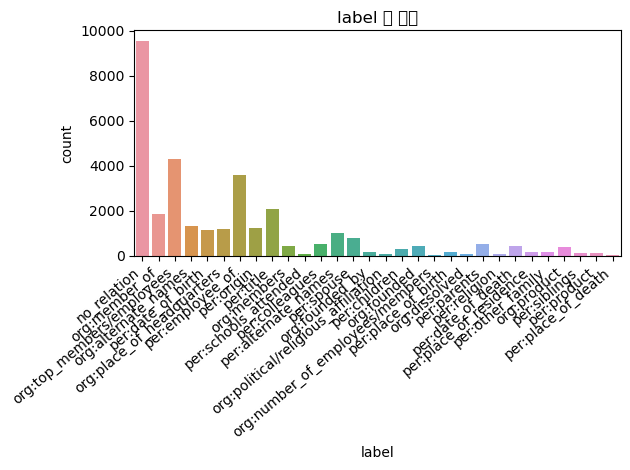

In [22]:
ax = sns.countplot(x='label', data = df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')

plt.title("label 별 분포")
plt.tight_layout()
plt.show()

# df 데이터프레임에 pair_type 이라는 새로운 열 추가하기
pair_type의 element : (subject type, object type)

In [163]:
temp = []
for i in range(len(df)):
    temp.append((eval(df["subject_entity"][i])["type"], eval(df["object_entity"][i])["type"]))

In [164]:
#기존 df에 pair_type 이라는 새로운 column
df["pair_type"] = temp

In [165]:
df.head()

,id,sentence,subject_entity,object_entity,label,source,pair_type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}",no_relation,wikipedia,"(ORG, PER)"
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}","{'word': '대안신당', 'start_idx': 14, 'end_idx': 17, 'type': 'ORG'}",no_relation,wikitree,"(ORG, ORG)"
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx': 41, 'type': 'ORG'}",org:member_of,wikitree,"(ORG, ORG)"
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪고 있는 대구광역시에 행복박스를 전달했다고 10일 밝혔다.,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}","{'word': '박정부', 'start_idx': 22, 'end_idx': 24, 'type': 'PER'}",org:top_members/employees,wikitree,"(ORG, PER)"
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8번으로 배정되었다.,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}","{'word': '1967', 'start_idx': 0, 'end_idx': 3, 'type': 'DAT'}",no_relation,wikipedia,"(ORG, DAT)"


# label_{num}_df 만들기
### num에 해당하는 label만 모아 놓은 dataframe

In [166]:
labels = list(df["label"].value_counts().index)
print(labels) #data가 많은 labels 순서로 저장됨

['no_relation', 'org:top_members/employees', 'per:employee_of', 'per:title', 'org:member_of', 'org:alternate_names', 'per:origin', 'org:place_of_headquarters', 'per:date_of_birth', 'per:alternate_names', 'per:spouse', 'per:colleagues', 'per:parents', 'org:founded', 'org:members', 'per:date_of_death', 'org:product', 'per:children', 'per:place_of_residence', 'per:other_family', 'per:place_of_birth', 'org:founded_by', 'per:product', 'per:siblings', 'org:political/religious_affiliation', 'per:religion', 'per:schools_attended', 'org:dissolved', 'org:number_of_employees/members', 'per:place_of_death']


In [167]:
labels_id = dict(zip(labels, range(30)))
print(labels_id)

{'no_relation': 0, 'org:top_members/employees': 1, 'per:employee_of': 2, 'per:title': 3, 'org:member_of': 4, 'org:alternate_names': 5, 'per:origin': 6, 'org:place_of_headquarters': 7, 'per:date_of_birth': 8, 'per:alternate_names': 9, 'per:spouse': 10, 'per:colleagues': 11, 'per:parents': 12, 'org:founded': 13, 'org:members': 14, 'per:date_of_death': 15, 'org:product': 16, 'per:children': 17, 'per:place_of_residence': 18, 'per:other_family': 19, 'per:place_of_birth': 20, 'org:founded_by': 21, 'per:product': 22, 'per:siblings': 23, 'org:political/religious_affiliation': 24, 'per:religion': 25, 'per:schools_attended': 26, 'org:dissolved': 27, 'org:number_of_employees/members': 28, 'per:place_of_death': 29}


In [168]:
# label_{num}_df 만들기
for label in labels:
    globals()[f"label_{labels_id[label]}_df"] = df.loc[df["label"]==label,]

In [169]:
# label_0_df 확인
label_0_df.head()

,id,sentence,subject_entity,object_entity,label,source,pair_type
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}",no_relation,wikipedia,"(ORG, PER)"
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}","{'word': '대안신당', 'start_idx': 14, 'end_idx': 17, 'type': 'ORG'}",no_relation,wikitree,"(ORG, ORG)"
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8번으로 배정되었다.,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}","{'word': '1967', 'start_idx': 0, 'end_idx': 3, 'type': 'DAT'}",no_relation,wikipedia,"(ORG, DAT)"
6,6,그에 따라 나폴리와 계약을 연장한 마라도나는 1989년 팀을 UEFA컵 정상으로 인도했으며 이듬해에는 유럽 챔피언 AC 밀란을 상대로 승리를 거두고 다시 한 번 세리에A에서 정상에 등극했다.,"{'word': 'AC 밀란', 'start_idx': 64, 'end_idx': 68, 'type': 'ORG'}","{'word': '1989', 'start_idx': 25, 'end_idx': 28, 'type': 'DAT'}",no_relation,wikipedia,"(ORG, DAT)"
14,14,"조토 디 본도네, 마사초, 피에로 델라 프란체스카, 도메니코 기를란다요, 페루지노, 미켈란젤로, 라파엘로, 보티첼리, 레오나르도 다빈치, 티치아노 등으로 대표되는 이탈리아 르네상스 회화는 당대와 그 이후의 시기 유럽 전체에 영향을 주었다.","{'word': '미켈란젤로', 'start_idx': 47, 'end_idx': 51, 'type': 'PER'}","{'word': '르네상스', 'start_idx': 96, 'end_idx': 99, 'type': 'DAT'}",no_relation,wikipedia,"(PER, DAT)"


In [170]:
# label_1_df 확인
label_1_df.head()

,id,sentence,subject_entity,object_entity,label,source,pair_type
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪고 있는 대구광역시에 행복박스를 전달했다고 10일 밝혔다.,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}","{'word': '박정부', 'start_idx': 22, 'end_idx': 24, 'type': 'PER'}",org:top_members/employees,wikitree,"(ORG, PER)"
12,12,"2009년 9월, 미국 프로 야구 필라델피아 필리스 소속의 야구 선수 박찬호는 《MBC 스페셜-박찬호는 당신을 잊지 않았다》 편에서 “최진실 씨의 아픔과 죽음의 고통을 이해합니다. 최진실 씨 사건에 눈물을 흘렸습니다. 저도 죽으려고 마음을 먹었던 적이 있었습니다. 잘하려고 애를 쓰는데 비난과 비판이 쏟아졌습니다. 머리가 빠지고 너무 힘들었습니다”라고 말하며 최진실의 죽음에 대해 안타까움을 표현했다.","{'word': '필라델피아 필리스', 'start_idx': 19, 'end_idx': 27, 'type': 'ORG'}","{'word': '박찬호', 'start_idx': 39, 'end_idx': 41, 'type': 'PER'}",org:top_members/employees,wikipedia,"(ORG, PER)"
36,36,곡성군(군수 유근기)은 상수도 사용 가구를 대상으로 올해부터 옥내 급수관 누수탐사 서비스를 연중 제공한다고 밝혔다.,"{'word': '곡성군', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}","{'word': '유근기', 'start_idx': 7, 'end_idx': 9, 'type': 'PER'}",org:top_members/employees,wikitree,"(ORG, PER)"
39,39,앞서 구혜선은 안재현이 소속사인 HB엔터테인먼트의 문보미 대표와 자신을 험담했다고 주장한 바 있다.,"{'word': 'HB엔터테인먼트', 'start_idx': 18, 'end_idx': 25, 'type': 'ORG'}","{'word': '문보미', 'start_idx': 28, 'end_idx': 30, 'type': 'PER'}",org:top_members/employees,wikitree,"(ORG, PER)"
53,53,공무원연금공단(이사장 정남준)은 10월 28일부터 11월 1일까지 '인권 존중·배려 주간'을 운영하여 직장 내 괴롭힘 근절 등 인권경영 실천에 앞장선다.,"{'word': '공무원연금공단', 'start_idx': 0, 'end_idx': 6, 'type': 'ORG'}","{'word': '정남준', 'start_idx': 12, 'end_idx': 14, 'type': 'PER'}",org:top_members/employees,wikitree,"(ORG, PER)"


# 각 레이블 별로 어떤 pair_type이 있는지 확인하기

In [179]:
for label in labels:
    print(f"{label}에 해당하는 pair_type들:\n ", globals()[f"label_{labels_id[label]}_df"]["pair_type"].unique(), "\n")
   

no_relation에 해당하는 pair_type들:
  [('ORG', 'PER') ('ORG', 'ORG') ('ORG', 'DAT') ('PER', 'DAT')
 ('PER', 'ORG') ('PER', 'PER') ('PER', 'POH') ('ORG', 'POH')
 ('ORG', 'NOH') ('PER', 'NOH') ('ORG', 'LOC') ('PER', 'LOC')] 

org:top_members/employees에 해당하는 pair_type들:
  [('ORG', 'PER') ('ORG', 'POH') ('ORG', 'ORG') ('ORG', 'LOC')
 ('ORG', 'NOH') ('PER', 'PER')] 

per:employee_of에 해당하는 pair_type들:
  [('PER', 'ORG') ('PER', 'PER') ('PER', 'POH') ('PER', 'LOC')
 ('PER', 'DAT') ('PER', 'NOH')] 

per:title에 해당하는 pair_type들:
  [('PER', 'POH') ('PER', 'ORG') ('PER', 'LOC') ('PER', 'NOH')
 ('PER', 'PER') ('PER', 'DAT')] 

org:member_of에 해당하는 pair_type들:
  [('ORG', 'ORG') ('ORG', 'LOC') ('ORG', 'POH') ('ORG', 'DAT')
 ('ORG', 'NOH') ('ORG', 'PER')] 

org:alternate_names에 해당하는 pair_type들:
  [('ORG', 'ORG') ('ORG', 'POH') ('ORG', 'PER') ('ORG', 'LOC')
 ('ORG', 'NOH') ('ORG', 'DAT')] 

per:origin에 해당하는 pair_type들:
  [('PER', 'LOC') ('PER', 'DAT') ('PER', 'POH') ('PER', 'PER')
 ('PER', 'ORG') ('PER', 'NOH'

In [266]:
for label in labels:
    print(f"{label}에 해당하는 pair_type들의 분포:\n ", globals()[f"label_{labels_id[label]}_df"]["pair_type"].value_counts(), "\n")
   

no_relation에 해당하는 pair_type들의 분포:
  (ORG, ORG)    1958
(ORG, DAT)    1582
(PER, PER)    1399
(PER, POH)    1055
(PER, ORG)    741 
(ORG, POH)    725 
(ORG, LOC)    548 
(PER, DAT)    505 
(ORG, PER)    401 
(PER, LOC)    310 
(ORG, NOH)    192 
(PER, NOH)    118 
Name: pair_type, dtype: int64 

org:top_members/employees에 해당하는 pair_type들의 분포:
  (ORG, PER)    4195
(ORG, POH)    52  
(ORG, ORG)    22  
(ORG, LOC)    13  
(PER, PER)    1   
(ORG, NOH)    1   
Name: pair_type, dtype: int64 

per:employee_of에 해당하는 pair_type들의 분포:
  (PER, ORG)    2857
(PER, PER)    391 
(PER, LOC)    165 
(PER, POH)    135 
(PER, DAT)    19  
(PER, NOH)    6   
Name: pair_type, dtype: int64 

per:title에 해당하는 pair_type들의 분포:
  (PER, POH)    1845
(PER, ORG)    141 
(PER, LOC)    81  
(PER, NOH)    19  
(PER, PER)    14  
(PER, DAT)    3   
Name: pair_type, dtype: int64 

org:member_of에 해당하는 pair_type들의 분포:
  (ORG, ORG)    1320
(ORG, POH)    358 
(ORG, LOC)    173 
(ORG, NOH)    9   
(ORG, DAT)    5   
(ORG, PER

In [429]:
df[(df["pair_type"]==("PER", "DAT")) & (df["label"]=="per:place_of_death")]

,id,sentence,subject_entity,object_entity,label,source,pair_type
29266,29266,묵돌이 선우가 된 209년에는 진시황이 사망한 직후였으며 이로 인해 진나라가 큰 혼란에 빠져 중국은 초한전쟁이라는 내전을 치르고 있었다.,"{'word': '진시황', 'start_idx': 17, 'end_idx': 19, 'type': 'PER'}","{'word': '진나라', 'start_idx': 38, 'end_idx': 40, 'type': 'DAT'}",per:place_of_death,wikipedia,"(PER, DAT)"


In [196]:
# 존재하는 총 pair_type
pair_types = list(df["pair_type"].unique())
print(pair_types)
print()
print(f"총 {len(pair_types)} 개")

[('ORG', 'PER'), ('ORG', 'ORG'), ('ORG', 'DAT'), ('PER', 'DAT'), ('ORG', 'LOC'), ('PER', 'ORG'), ('PER', 'LOC'), ('PER', 'POH'), ('PER', 'PER'), ('ORG', 'POH'), ('ORG', 'NOH'), ('PER', 'NOH')]

총 12 개


In [197]:
# 각 pair_type에 대응하는 label

for pair_type in pair_types:
    result = df.loc[df["pair_type"]==pair_type]["label"].unique()
    
    print(f"{pair_type} 에 대응하는 label:")
    print(result)
    print(f"총 {len(result)} 개\n")

('ORG', 'PER') 에 대응하는 label:
['no_relation' 'org:top_members/employees' 'org:founded_by'
 'org:alternate_names' 'org:product' 'org:place_of_headquarters'
 'org:political/religious_affiliation' 'org:members' 'org:member_of']
총 9 개

('ORG', 'ORG') 에 대응하는 label:
['no_relation' 'org:member_of' 'org:alternate_names' 'org:members'
 'org:product' 'org:political/religious_affiliation'
 'org:place_of_headquarters' 'org:founded_by' 'org:top_members/employees']
총 9 개

('ORG', 'DAT') 에 대응하는 label:
['no_relation' 'org:founded' 'org:dissolved' 'org:member_of'
 'org:place_of_headquarters' 'org:members'
 'org:political/religious_affiliation' 'org:alternate_names']
총 8 개

('PER', 'DAT') 에 대응하는 label:
['per:date_of_birth' 'no_relation' 'per:origin' 'per:date_of_death'
 'per:employee_of' 'per:place_of_birth' 'per:parents'
 'per:place_of_residence' 'per:children' 'per:title' 'per:colleagues'
 'per:place_of_death' 'per:spouse']
총 13 개

('ORG', 'LOC') 에 대응하는 label:
['org:place_of_headquarters' 'org:members'

In [225]:
# 각 pair_type 별 해당하는 label을 딕셔너리 형태로 만들자! -> pair_type_label_dict
# key: pair_type, value: label의 리스트

pair_type_label_dict = {}

for pair_type in pair_types:
    pair_type_label_dict[pair_type] = list(df.loc[df["pair_type"]==pair_type]["label"].unique())

pair_type_label_dict

{('ORG', 'PER'): ['no_relation',
  'org:top_members/employees',
  'org:founded_by',
  'org:alternate_names',
  'org:product',
  'org:place_of_headquarters',
  'org:political/religious_affiliation',
  'org:members',
  'org:member_of'],
 ('ORG', 'ORG'): ['no_relation',
  'org:member_of',
  'org:alternate_names',
  'org:members',
  'org:product',
  'org:political/religious_affiliation',
  'org:place_of_headquarters',
  'org:founded_by',
  'org:top_members/employees'],
 ('ORG', 'DAT'): ['no_relation',
  'org:founded',
  'org:dissolved',
  'org:member_of',
  'org:place_of_headquarters',
  'org:members',
  'org:political/religious_affiliation',
  'org:alternate_names'],
 ('PER', 'DAT'): ['per:date_of_birth',
  'no_relation',
  'per:origin',
  'per:date_of_death',
  'per:employee_of',
  'per:place_of_birth',
  'per:parents',
  'per:place_of_residence',
  'per:children',
  'per:title',
  'per:colleagues',
  'per:place_of_death',
  'per:spouse'],
 ('ORG', 'LOC'): ['org:place_of_headquarters',
 

깨달음
- pair_type 정보를 이용하자
- 지금껏 모든 pair_type에 대해서 모두 30개의 label로 분류 작업을 진행했다.
- 이제는 각 pair_type별로 해당하는 label에 대해서만 분류를 진행하자!(훨씬 경제적이고 틀릴 수 있는 가능성을 배재한다!)

# df에 pair_type 별로 몇개의 데이터가 있는지 확인하기

In [199]:
print(pair_types)

[('ORG', 'PER'), ('ORG', 'ORG'), ('ORG', 'DAT'), ('PER', 'DAT'), ('ORG', 'LOC'), ('PER', 'ORG'), ('PER', 'LOC'), ('PER', 'POH'), ('PER', 'PER'), ('ORG', 'POH'), ('ORG', 'NOH'), ('PER', 'NOH')]


In [202]:
df["pair_type"].value_counts()

(ORG, ORG)    5100
(PER, PER)    5009
(ORG, PER)    4779
(PER, ORG)    4246
(PER, POH)    3454
(PER, DAT)    2139
(ORG, DAT)    2110
(PER, LOC)    1785
(ORG, LOC)    1776
(ORG, POH)    1659
(ORG, NOH)    260 
(PER, NOH)    153 
Name: pair_type, dtype: int64

# 결과비교

In [259]:
# <계획>
# 잘못 예측한 것 확인하기
# 잘못 예측한 것 중에서 pair_type 고려할때 말도안되게 예측한것 확인하기

In [260]:
dev0 = pd.read_csv('./dataset/train/dev0.csv')
dev0.head()

,Unnamed: 0,id,sentence,subject_entity,object_entity,source,label
0,0,5,": 유엔, 유럽 의회, 북대서양 조약 기구 (NATO), 국제이주기구, 세계 보건 기구 (WHO), 지중해 연합, 이슬람 협력 기구, 유럽 안보 협력 기구, 국제 통화 기금, 세계무역기구 그리고 프랑코포니.","{'word': '북대서양 조약 기구', 'start_idx': 13, 'end_idx': 22, 'type': 'ORG'}","{'word': 'NATO', 'start_idx': 25, 'end_idx': 28, 'type': 'ORG'}",wikipedia,org:alternate_names
1,1,12,"2009년 9월, 미국 프로 야구 필라델피아 필리스 소속의 야구 선수 박찬호는 《MBC 스페셜-박찬호는 당신을 잊지 않았다》 편에서 “최진실 씨의 아픔과 죽음의 고통을 이해합니다. 최진실 씨 사건에 눈물을 흘렸습니다. 저도 죽으려고 마음을 먹었던 적이 있었습니다. 잘하려고 애를 쓰는데 비난과 비판이 쏟아졌습니다. 머리가 빠지고 너무 힘들었습니다”라고 말하며 최진실의 죽음에 대해 안타까움을 표현했다.","{'word': '필라델피아 필리스', 'start_idx': 19, 'end_idx': 27, 'type': 'ORG'}","{'word': '박찬호', 'start_idx': 39, 'end_idx': 41, 'type': 'PER'}",wikipedia,org:top_members/employees
2,2,15,"성명에는 더불어민주당 이상민 대전광역시당 위원장, 이춘희 세종특별자치시당 위원장, 홍재형 충청북도당 위원장, 박수현 충청남도당 위원장, 이해찬, 박병석, 변재일, 오제세, 노영민, 양승조, 박범계, 박완주 의원이 서명했다.","{'word': '노영민', 'start_idx': 96, 'end_idx': 98, 'type': 'PER'}","{'word': '더불어민주당', 'start_idx': 5, 'end_idx': 10, 'type': 'ORG'}",wikipedia,per:employee_of
3,3,18,"문성민은 경기대학교에 입학하여 황동일, 신영석과 함께 경기대학교의 전성기를 이끌면서 하계대회, 전국체전, 최강전 등 3관왕을 이룬다.","{'word': '문성민', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}","{'word': '경기대', 'start_idx': 5, 'end_idx': 7, 'type': 'ORG'}",wikipedia,per:schools_attended
4,4,22,"박흥식은 첫 부인과의 사이에 장녀 박병숙을 두었고, 두 번째 부인은 경희대학교 교수를 지낸 피아니스트 한인하이며, 두 사람 사이에서 태어난 딸 박봉숙은 이화여자대학교 교수를 지냈다.","{'word': '박흥식', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}","{'word': '한인하', 'start_idx': 57, 'end_idx': 59, 'type': 'PER'}",wikipedia,per:spouse


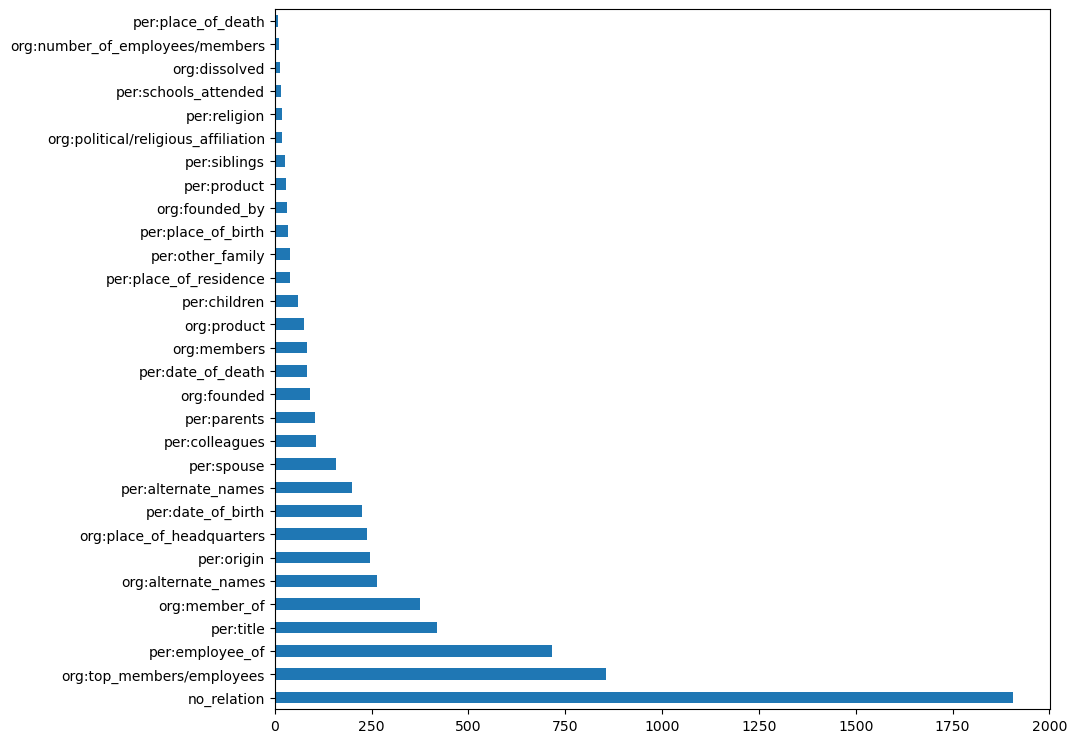

In [261]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(211)
ax1 = dev0['label'].value_counts().plot(kind='barh')

In [262]:
#dev0에 pair_type 열 추가하자
temp = []
for i in range(len(dev0)):
    temp.append((eval(dev0["subject_entity"][i])["type"], eval(dev0["object_entity"][i])["type"]))
    
dev0["pair_type"] = temp
dev0.head()

,Unnamed: 0,id,sentence,subject_entity,object_entity,source,label,pair_type
0,0,5,": 유엔, 유럽 의회, 북대서양 조약 기구 (NATO), 국제이주기구, 세계 보건 기구 (WHO), 지중해 연합, 이슬람 협력 기구, 유럽 안보 협력 기구, 국제 통화 기금, 세계무역기구 그리고 프랑코포니.","{'word': '북대서양 조약 기구', 'start_idx': 13, 'end_idx': 22, 'type': 'ORG'}","{'word': 'NATO', 'start_idx': 25, 'end_idx': 28, 'type': 'ORG'}",wikipedia,org:alternate_names,"(ORG, ORG)"
1,1,12,"2009년 9월, 미국 프로 야구 필라델피아 필리스 소속의 야구 선수 박찬호는 《MBC 스페셜-박찬호는 당신을 잊지 않았다》 편에서 “최진실 씨의 아픔과 죽음의 고통을 이해합니다. 최진실 씨 사건에 눈물을 흘렸습니다. 저도 죽으려고 마음을 먹었던 적이 있었습니다. 잘하려고 애를 쓰는데 비난과 비판이 쏟아졌습니다. 머리가 빠지고 너무 힘들었습니다”라고 말하며 최진실의 죽음에 대해 안타까움을 표현했다.","{'word': '필라델피아 필리스', 'start_idx': 19, 'end_idx': 27, 'type': 'ORG'}","{'word': '박찬호', 'start_idx': 39, 'end_idx': 41, 'type': 'PER'}",wikipedia,org:top_members/employees,"(ORG, PER)"
2,2,15,"성명에는 더불어민주당 이상민 대전광역시당 위원장, 이춘희 세종특별자치시당 위원장, 홍재형 충청북도당 위원장, 박수현 충청남도당 위원장, 이해찬, 박병석, 변재일, 오제세, 노영민, 양승조, 박범계, 박완주 의원이 서명했다.","{'word': '노영민', 'start_idx': 96, 'end_idx': 98, 'type': 'PER'}","{'word': '더불어민주당', 'start_idx': 5, 'end_idx': 10, 'type': 'ORG'}",wikipedia,per:employee_of,"(PER, ORG)"
3,3,18,"문성민은 경기대학교에 입학하여 황동일, 신영석과 함께 경기대학교의 전성기를 이끌면서 하계대회, 전국체전, 최강전 등 3관왕을 이룬다.","{'word': '문성민', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}","{'word': '경기대', 'start_idx': 5, 'end_idx': 7, 'type': 'ORG'}",wikipedia,per:schools_attended,"(PER, ORG)"
4,4,22,"박흥식은 첫 부인과의 사이에 장녀 박병숙을 두었고, 두 번째 부인은 경희대학교 교수를 지낸 피아니스트 한인하이며, 두 사람 사이에서 태어난 딸 박봉숙은 이화여자대학교 교수를 지냈다.","{'word': '박흥식', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}","{'word': '한인하', 'start_idx': 57, 'end_idx': 59, 'type': 'PER'}",wikipedia,per:spouse,"(PER, PER)"


In [263]:
#dev0에 pred 열 추가하자
dev0_pred = pd.read_csv('dev0_inference_2000.csv')
dev0['pred'] = dev0_pred['pred_label']
dev0.head()

,Unnamed: 0,id,sentence,subject_entity,object_entity,source,label,pair_type,pred
0,0,5,": 유엔, 유럽 의회, 북대서양 조약 기구 (NATO), 국제이주기구, 세계 보건 기구 (WHO), 지중해 연합, 이슬람 협력 기구, 유럽 안보 협력 기구, 국제 통화 기금, 세계무역기구 그리고 프랑코포니.","{'word': '북대서양 조약 기구', 'start_idx': 13, 'end_idx': 22, 'type': 'ORG'}","{'word': 'NATO', 'start_idx': 25, 'end_idx': 28, 'type': 'ORG'}",wikipedia,org:alternate_names,"(ORG, ORG)",org:alternate_names
1,1,12,"2009년 9월, 미국 프로 야구 필라델피아 필리스 소속의 야구 선수 박찬호는 《MBC 스페셜-박찬호는 당신을 잊지 않았다》 편에서 “최진실 씨의 아픔과 죽음의 고통을 이해합니다. 최진실 씨 사건에 눈물을 흘렸습니다. 저도 죽으려고 마음을 먹었던 적이 있었습니다. 잘하려고 애를 쓰는데 비난과 비판이 쏟아졌습니다. 머리가 빠지고 너무 힘들었습니다”라고 말하며 최진실의 죽음에 대해 안타까움을 표현했다.","{'word': '필라델피아 필리스', 'start_idx': 19, 'end_idx': 27, 'type': 'ORG'}","{'word': '박찬호', 'start_idx': 39, 'end_idx': 41, 'type': 'PER'}",wikipedia,org:top_members/employees,"(ORG, PER)",org:top_members/employees
2,2,15,"성명에는 더불어민주당 이상민 대전광역시당 위원장, 이춘희 세종특별자치시당 위원장, 홍재형 충청북도당 위원장, 박수현 충청남도당 위원장, 이해찬, 박병석, 변재일, 오제세, 노영민, 양승조, 박범계, 박완주 의원이 서명했다.","{'word': '노영민', 'start_idx': 96, 'end_idx': 98, 'type': 'PER'}","{'word': '더불어민주당', 'start_idx': 5, 'end_idx': 10, 'type': 'ORG'}",wikipedia,per:employee_of,"(PER, ORG)",per:employee_of
3,3,18,"문성민은 경기대학교에 입학하여 황동일, 신영석과 함께 경기대학교의 전성기를 이끌면서 하계대회, 전국체전, 최강전 등 3관왕을 이룬다.","{'word': '문성민', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}","{'word': '경기대', 'start_idx': 5, 'end_idx': 7, 'type': 'ORG'}",wikipedia,per:schools_attended,"(PER, ORG)",per:schools_attended
4,4,22,"박흥식은 첫 부인과의 사이에 장녀 박병숙을 두었고, 두 번째 부인은 경희대학교 교수를 지낸 피아니스트 한인하이며, 두 사람 사이에서 태어난 딸 박봉숙은 이화여자대학교 교수를 지냈다.","{'word': '박흥식', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}","{'word': '한인하', 'start_idx': 57, 'end_idx': 59, 'type': 'PER'}",wikipedia,per:spouse,"(PER, PER)",per:spouse


In [420]:
total_wrong = 0 #잘못 예측한 개수
total_impossible_pred = 0 #잘못 예측한 것 중 예측 자체를 pair_type 고려할때 말도 안되게 한 것

for i in range(len(dev0)):
    if dev0.iloc[i,:]["label"]!=dev0.iloc[i,:]["pred"]:
        total_wrong += 1
        if dev0.iloc[i,:]["pred"] not in pair_type_label_dict[dev0.iloc[i,:]["pair_type"]]:
            total_impossible_pred += 1
        
                
print(total_wrong)
print(total_impossible_pred)
print(total_impossible_pred/total_wrong)

# 유레카!!!
# pair_type을 고려하지 않고 틀리게 예측한게 존재한다! 3.8%이긴 하지만...!

362
14
0.03867403314917127


In [313]:
pair_types

[('ORG', 'PER'),
 ('ORG', 'ORG'),
 ('ORG', 'DAT'),
 ('PER', 'DAT'),
 ('ORG', 'LOC'),
 ('PER', 'ORG'),
 ('PER', 'LOC'),
 ('PER', 'POH'),
 ('PER', 'PER'),
 ('ORG', 'POH'),
 ('ORG', 'NOH'),
 ('PER', 'NOH')]

In [336]:
labels_wrong = dict(zip(labels, [0]*len(labels))) #우리가 맞추지 못한 각 label 별 개수
pair_types_wrong = dict(zip(pair_types, [0]*len(pair_types))) #우리가 맞추지 못한 각 pair_type별 개수

labels_wrong2 = dict(zip(labels, [0]*len(labels))) # 오답으로 내놓은 label의 개수

In [337]:
#그냥 틀린거 육안으로 봐보자

In [338]:
aaa= {'no_relation': 0, 'org:top_members/employees': 1, 'org:members': 2, 'org:product': 3,
 'per:title': 4, 'org:alternate_names': 5, 'per:employee_of': 6, 'org:place_of_headquarters': 7,
 'per:product': 8, 'org:number_of_employees/members': 9, 'per:children': 10, 'per:place_of_residence': 11,
 'per:alternate_names': 12, 'per:other_family': 13, 'per:colleagues': 14, 'per:origin': 15, 'per:siblings': 16,
 'per:spouse': 17, 'org:founded': 18, 'org:political/religious_affiliation': 19, 'org:member_of': 20,
 'per:parents': 21, 'org:dissolved': 22, 'per:schools_attended': 23, 'per:date_of_death': 24,
 'per:date_of_birth': 25, 'per:place_of_birth': 26, 'per:place_of_death': 27, 'org:founded_by': 28,
 'per:religion': 29}

# ai stage에서 정해준 것

count = 0


for i in range(len(dev0)):
    if dev0.iloc[i,:]["label"]!=dev0.iloc[i,:]["pred"]:
        print(dev0.iloc[i,:]['sentence'])
        print(dev0.iloc[i,:]['subject_entity'])
        print(dev0.iloc[i,:]['object_entity'])
        print(dev0.iloc[i,:]['pair_type'])
        print(dev0.iloc[i,:]['id'])
        print('')
        print('corret answer = ',dev0.iloc[i,:]['label'])
        print('')
        print('wrong pred = ',dev0.iloc[i,:]['pred'])
        print('')
        print("틀린정답의 정답일 확률: = ",eval(dev0_pred.iloc[i,:]["probs"])[aaa[dev0_pred.iloc[i,:]["pred_label"]]])
        print("맞은정답의 정답일 확률: = ",eval(dev0_pred.iloc[i,:]["probs"])[aaa[dev0.iloc[i,:]["label"]]])
        
        
        print('#########################################################################################################################################')
        print('#########################################################################################################################################')
        print('')
        
        
        #labels_wrong 채우기
        labels_wrong[dev0.iloc[i,:]["label"]]+=1
        
        #labels_wrong2 채우기
        labels_wrong2[dev0_pred.iloc[i,:]["pred_label"]]+=1
        
        #pair_types_wrong 채우기
        pair_types_wrong[dev0.iloc[i,:]["pair_type"]]+=1
        
        if (eval(dev0_pred.iloc[i,:]["probs"])[aaa[dev0_pred.iloc[i,:]["pred_label"]]]-\
            eval(dev0_pred.iloc[i,:]["probs"])[aaa[dev0.iloc[i,:]["label"]]])<0.2:
            count+=1
        
        
        

1824년에 있었던 첫 졸업식에는 대통령 제임스 먼로와 존 C. 칼훈, 헨리 클레이 시니어, 질베르 뒤 모티에 드 라파예트 후작 등이 참석했다.
{'word': '존 C. 칼훈', 'start_idx': 31, 'end_idx': 37, 'type': 'PER'}
{'word': '제임스 먼로', 'start_idx': 23, 'end_idx': 28, 'type': 'PER'}
('PER', 'PER')
27

corret answer =  no_relation

wrong pred =  per:colleagues

틀린정답의 정답일 확률: =  0.9662523865699768
맞은정답의 정답일 확률: =  0.012204920873045921
#########################################################################################################################################
#########################################################################################################################################

2008-09 시즌, 그는 페페의 10경기 출장 정지 징계로부터 수혜를 받은 선수로, 4-2로 이긴 세비야와의 경기에서 훌륭한 활약을 펼쳤지만, 바르셀로나와의 안방 경기에 2-6으로 패할 때에도 출전했고, 자신의 스페인 무대 최다인 12경기 출장을 기록했다.
{'word': '세비야', 'start_idx': 56, 'end_idx': 58, 'type': 'ORG'}
{'word': '스페인', 'start_idx': 119, 'end_idx': 121, 'type': 'LOC'}
('ORG', 'LOC')
42

corret answer =  org:member_of

wrong pred =  org:place_of_headq

탐정 히다리 쇼타로와 동료 필립는 가면라이더 W의 "후토 시"에서 도펀트(Dopant)들과 대결하는 두 젊은이로, 가면라이더 W (가면라이더 더블)로 변신한다.
{'word': '히다리 쇼타로', 'start_idx': 3, 'end_idx': 9, 'type': 'PER'}
{'word': '가면라이더', 'start_idx': 64, 'end_idx': 68, 'type': 'POH'}
('PER', 'POH')
3907

corret answer =  per:title

wrong pred =  no_relation

틀린정답의 정답일 확률: =  0.9394257664680481
맞은정답의 정답일 확률: =  0.05176826938986778
#########################################################################################################################################
#########################################################################################################################################

예정된 시각보다 15분이 앞당겨진 오전 10시 15분, 김정은과 문재인 대통령은 평화의 집 2층 회담장에 함께 입장했으며 오전 정상회담은 확대정상회담으로, 남측은 서훈 국정원장과 임종석 대통령 비서실장이, 북측은 김여정과 김영철이 배석한 가운데 약 100분간 진행됐다.
{'word': '김여정', 'start_idx': 119, 'end_idx': 121, 'type': 'PER'}
{'word': '김정은', 'start_idx': 31, 'end_idx': 33, 'type': 'PER'}
('PER', 'PER')
3912

corret answer =  no_relation

wrong pred =  per:collea

역으로 말하면, 루간스크 인민 공화국이 루한스크 주 영역의 절반을 통제하고 있는 상태이다.
{'word': '루간스크 인민 공화국', 'start_idx': 9, 'end_idx': 19, 'type': 'ORG'}
{'word': '루한스크 주', 'start_idx': 22, 'end_idx': 27, 'type': 'LOC'}
('ORG', 'LOC')
7259

corret answer =  org:place_of_headquarters

wrong pred =  no_relation

틀린정답의 정답일 확률: =  0.8325481414794922
맞은정답의 정답일 확률: =  0.008486962877213955
#########################################################################################################################################
#########################################################################################################################################

955년 오토 1세가 장남 리우돌프를 보내 베렝가리오 1세와 그 아들 아달베르토 2세를 상대하게 했으나 리우돌프가 승리한 뒤 독일로 돌아갔다가 갑자기 말라리아에 걸려 사망하면서 그의 아버지 베렝가리오 2세와 아달베르토는 다시 이탈리아의 패권을 손에 쥐었다.
{'word': '베렝가리오 1세', 'start_idx': 24, 'end_idx': 31, 'type': 'PER'}
{'word': '오토 1세', 'start_idx': 5, 'end_idx': 9, 'type': 'PER'}
('PER', 'PER')
7328

corret answer =  no_relation

wrong pred =  per:parents

틀린정답의 정답일 확률: =  

앞서 송중기 씨 아버지는 아들의 파경 소식이 보도된 뒤 포털사이트 실시간 검색어 1위에 오르는 등 덩달아 화제의 중심에 섰다.
{'word': '송중기', 'start_idx': 3, 'end_idx': 5, 'type': 'PER'}
{'word': '아버지', 'start_idx': 9, 'end_idx': 11, 'type': 'POH'}
('PER', 'POH')
10390

corret answer =  no_relation

wrong pred =  per:parents

틀린정답의 정답일 확률: =  0.5996125936508179
맞은정답의 정답일 확률: =  0.2682870328426361
#########################################################################################################################################
#########################################################################################################################################

오장은 어린 시장 벨기에 축구 유학을 떠났지만 실패한 채 국내로 돌아왔으며,서귀포고 재학 시절 당시 수원 삼성의 코치였던 윤성효 코치 눈에 띄어 서귀포고를 중퇴하고 수원 삼성의 2군에서 훈련하였으나, 2001년 8월에 FC 도쿄의 입단테스트에 참가했고 연습생의 조건으로 2002년에는 아마추어 계약을 체결했고, 2004년에 비로소 정식 프로계약을 맺었다.
{'word': '오장은', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}
{'word': 'FC 도쿄', 'start_idx': 122, 'end_idx': 126, 'type': 'ORG'}
('PER', 'ORG')
10414

corret answer =  per:employee

국제적으로는 유럽 좌파당의 일원이며, 유럽 의회 교섭단체인 유럽 연합 좌파-북유럽 녹색 좌파에서 가장 많은 의석수를 가지고 있다.
{'word': '유럽 좌파당', 'start_idx': 7, 'end_idx': 12, 'type': 'ORG'}
{'word': '유럽 연합 좌파', 'start_idx': 33, 'end_idx': 40, 'type': 'ORG'}
('ORG', 'ORG')
12917

corret answer =  no_relation

wrong pred =  org:alternate_names

틀린정답의 정답일 확률: =  0.7237281203269958
맞은정답의 정답일 확률: =  0.11983701586723328
#########################################################################################################################################
#########################################################################################################################################

현재는 찰스 2세의 후궁에게서 낳은 서자들과 찰스 1세의 후궁들에게서 낳은 서자들 중에서 백작작위를 받은 가문의 남계 후손이 일부 전하고 있다.
{'word': '찰스 2세', 'start_idx': 4, 'end_idx': 8, 'type': 'PER'}
{'word': '찰스 1세', 'start_idx': 25, 'end_idx': 29, 'type': 'PER'}
('PER', 'PER')
12971

corret answer =  no_relation

wrong pred =  per:other_family

틀린정답의 정답일 확률: =  0.36674389243125916
맞은정답의 정답일 확률: =  0.33466631

2012년 WK리그에서는 16승 2무 3패로 정규리그 2위를 기록했으며, 플레이오프에서 전북 KSPO를 3:2로 이기고 챔피언결정전에 진출했다.
{'word': '전북 KSPO', 'start_idx': 49, 'end_idx': 55, 'type': 'ORG'}
{'word': 'WK리그', 'start_idx': 6, 'end_idx': 9, 'type': 'POH'}
('ORG', 'POH')
15960

corret answer =  no_relation

wrong pred =  org:member_of

틀린정답의 정답일 확률: =  0.9606137871742249
맞은정답의 정답일 확률: =  0.029868431389331818
#########################################################################################################################################
#########################################################################################################################################

또한 이 시기에 쿠루족에 의해 고대 인도 최초의 국가인 쿠루 왕국이 건국되었는데, 9세기경 파리크시트 왕과 자나메자야 왕의 통치하에 전성기를 맞이하였고 이때 쿠루 왕국에서 아슈바메다 의례를 비롯한 여러 스라우타 의례들과 초기 바르나 제도가 정립되면서 쿠루 왕국은 한동안 베다 문화의 중심지로 자리매김하였다.
{'word': '자나메자야', 'start_idx': 60, 'end_idx': 64, 'type': 'PER'}
{'word': '쿠루 왕국', 'start_idx': 88, 'end_idx': 92, 'type': 'LOC'}
('PER', 'LOC')
15962

corret answer =  per:origin

wrong

그룹 2AM 출신 정진운 씨와 나인뮤지스 출신 경리가 열애를 인정한 가운데 두 사람이 듀엣곡을 작업하면서 인연을 맺게 됐다는 측근 증언이 전해졌다.
{'word': '정진운', 'start_idx': 10, 'end_idx': 12, 'type': 'PER'}
{'word': '2AM', 'start_idx': 3, 'end_idx': 5, 'type': 'PER'}
('PER', 'PER')
19431

corret answer =  per:origin

wrong pred =  per:employee_of

틀린정답의 정답일 확률: =  0.750474750995636
맞은정답의 정답일 확률: =  0.21611087024211884
#########################################################################################################################################
#########################################################################################################################################

전남도안전체험학습장은 영광군의 대응투자로 전라남도교육청에서 영광군 법성면 신장리 법성포초등학교 진량분교장 폐교 부지에 연면적 4천980㎡ 지하1층, 지상 2층 규모로 조성하여 지난해 9월 문을 열었다.
{'word': '영광군', 'start_idx': 12, 'end_idx': 14, 'type': 'ORG'}
{'word': '전라남도', 'start_idx': 23, 'end_idx': 26, 'type': 'ORG'}
('ORG', 'ORG')
19506

corret answer =  org:place_of_headquarters

wrong pred =  org:member_of

틀린정답의 정답일 확률: =  0.52095556

스테브 망당다(Steve Mandanda, 1985년 3월 28일 자이르 킨샤사 ~)는 프랑스의 축구 선수로, 리그 1의 마르세유에서 골키퍼로 활약하고 있다.
{'word': '스테브 망당다', 'start_idx': 0, 'end_idx': 6, 'type': 'PER'}
{'word': '자이르 킨샤사', 'start_idx': 37, 'end_idx': 43, 'type': 'LOC'}
('PER', 'LOC')
22781

corret answer =  per:origin

wrong pred =  per:place_of_birth

틀린정답의 정답일 확률: =  0.7855656743049622
맞은정답의 정답일 확률: =  0.127481609582901
#########################################################################################################################################
#########################################################################################################################################

부왕인 조지 6세가 요크 공작 시절에 태어난 요크 공녀 마거릿은 방계 왕족으로서 상대적으로 평범한 어린 시절을 보냈으나 백부인 에드워드 8세가 월리스 심프슨 부인과의 결혼을 위하여 퇴위하면서 조지 6세가 왕으로 즉위하자 왕위 계승 서열 2위의 직계 왕녀로 신분이 격상되었다.
{'word': '에드워드 8세', 'start_idx': 71, 'end_idx': 77, 'type': 'PER'}
{'word': '조지 6세', 'start_idx': 4, 'end_idx': 8, 'type': 'PER'}
('PER', 'PER')
23037

corret answer =  per:siblings

wrong pre

틀린정답의 정답일 확률: =  0.38463136553764343
맞은정답의 정답일 확률: =  0.3729623258113861
#########################################################################################################################################
#########################################################################################################################################

로마 제국이 성립된 이후 집정관직은 동로마 제국까지 이어졌으나 유스티니아누스 1세 때 로마 및 콘스탄티노폴리스의 선출 집정관이 폐지되었고 황제의 당연직으로 흡수되었다가 레온 6세 때 명칭 자체가 폐지되었다.
{'word': '유스티니아누스', 'start_idx': 35, 'end_idx': 41, 'type': 'PER'}
{'word': '콘스탄티노폴리스', 'start_idx': 53, 'end_idx': 60, 'type': 'LOC'}
('PER', 'LOC')
25832

corret answer =  per:place_of_residence

wrong pred =  no_relation

틀린정답의 정답일 확률: =  0.996783971786499
맞은정답의 정답일 확률: =  8.791789150564e-05
#########################################################################################################################################
####################################################################################################

틀린정답의 정답일 확률: =  0.4553107023239136
맞은정답의 정답일 확률: =  0.22757503390312195
#########################################################################################################################################
#########################################################################################################################################

얼마 후 경덕왕의 부인 만월부인이 혜공왕을 낳았고, 이것을 기뻐한 경덕왕이 혜공왕에게 "건운"이라는 이름을 지어주었다.
{'word': '경덕왕', 'start_idx': 37, 'end_idx': 39, 'type': 'PER'}
{'word': '혜공왕', 'start_idx': 19, 'end_idx': 21, 'type': 'PER'}
('PER', 'PER')
29119

corret answer =  per:parents

wrong pred =  per:children

틀린정답의 정답일 확률: =  0.8530453443527222
맞은정답의 정답일 확률: =  0.06800491362810135
#########################################################################################################################################
#########################################################################################################################################

프로젝트 그룹 워너원(Wanna One) 출신 가

단일 팀 선수로 개인 통산 최다 출장 신기록 464경기를 세웠으며, 대전 시티즌에서는 최은성이 은퇴한 뒤 등번호 21번을 21년 동안 결번하기로 정했다.
{'word': '최은성', 'start_idx': 48, 'end_idx': 50, 'type': 'PER'}
{'word': '대전 시티즌', 'start_idx': 38, 'end_idx': 43, 'type': 'ORG'}
('PER', 'ORG')
32443

corret answer =  no_relation

wrong pred =  per:employee_of

틀린정답의 정답일 확률: =  0.9675031304359436
맞은정답의 정답일 확률: =  0.02444838546216488
#########################################################################################################################################
#########################################################################################################################################

신라에서는 중기까지도 지배계층의 가계계승에 있어서 모계적인 경향이 그대로 존속되었고, 신라 화랑의 기원이 되는 원화가 여자였다는 점, 신라 역사상 여왕이 3명(진성여왕, 진덕여왕, 선덕여왕)이었다는 점 등을 미루어보아 삼국 중 여성에 대한 차별이 가장 적었던 국가는 신라로 추정할 수 있다.
{'word': '선덕여왕', 'start_idx': 101, 'end_idx': 104, 'type': 'PER'}
{'word': '진덕여왕', 'start_idx': 95, 'end_idx': 98, 'type': 'PER'}
('PER', 'PER')
32454

corret answer =  no_relation

wrong p

In [334]:
count

46

In [317]:
labels_wrong

{'no_relation': 137,
 'org:top_members/employees': 6,
 'per:employee_of': 22,
 'per:title': 7,
 'org:member_of': 27,
 'org:alternate_names': 9,
 'per:origin': 21,
 'org:place_of_headquarters': 21,
 'per:date_of_birth': 0,
 'per:alternate_names': 4,
 'per:spouse': 2,
 'per:colleagues': 9,
 'per:parents': 9,
 'org:founded': 0,
 'org:members': 12,
 'per:date_of_death': 1,
 'org:product': 5,
 'per:children': 11,
 'per:place_of_residence': 28,
 'per:other_family': 11,
 'per:place_of_birth': 6,
 'org:founded_by': 1,
 'per:product': 3,
 'per:siblings': 4,
 'org:political/religious_affiliation': 1,
 'per:religion': 1,
 'per:schools_attended': 0,
 'org:dissolved': 1,
 'org:number_of_employees/members': 3,
 'per:place_of_death': 0}

In [339]:
labels_wrong2 #우리가 오답을 외칠때 말한게 대부분 no_relation이다!

{'no_relation': 90,
 'org:top_members/employees': 8,
 'per:employee_of': 33,
 'per:title': 14,
 'org:member_of': 35,
 'org:alternate_names': 11,
 'per:origin': 41,
 'org:place_of_headquarters': 22,
 'per:date_of_birth': 4,
 'per:alternate_names': 5,
 'per:spouse': 12,
 'per:colleagues': 9,
 'per:parents': 11,
 'org:founded': 3,
 'org:members': 17,
 'per:date_of_death': 1,
 'org:product': 6,
 'per:children': 8,
 'per:place_of_residence': 4,
 'per:other_family': 12,
 'per:place_of_birth': 3,
 'org:founded_by': 2,
 'per:product': 2,
 'per:siblings': 0,
 'org:political/religious_affiliation': 3,
 'per:religion': 1,
 'per:schools_attended': 1,
 'org:dissolved': 2,
 'org:number_of_employees/members': 2,
 'per:place_of_death': 0}

In [318]:
pair_types_wrong

{('ORG', 'PER'): 17,
 ('ORG', 'ORG'): 67,
 ('ORG', 'DAT'): 6,
 ('PER', 'DAT'): 7,
 ('ORG', 'LOC'): 38,
 ('PER', 'ORG'): 34,
 ('PER', 'LOC'): 53,
 ('PER', 'POH'): 33,
 ('PER', 'PER'): 77,
 ('ORG', 'POH'): 25,
 ('ORG', 'NOH'): 5,
 ('PER', 'NOH'): 0}

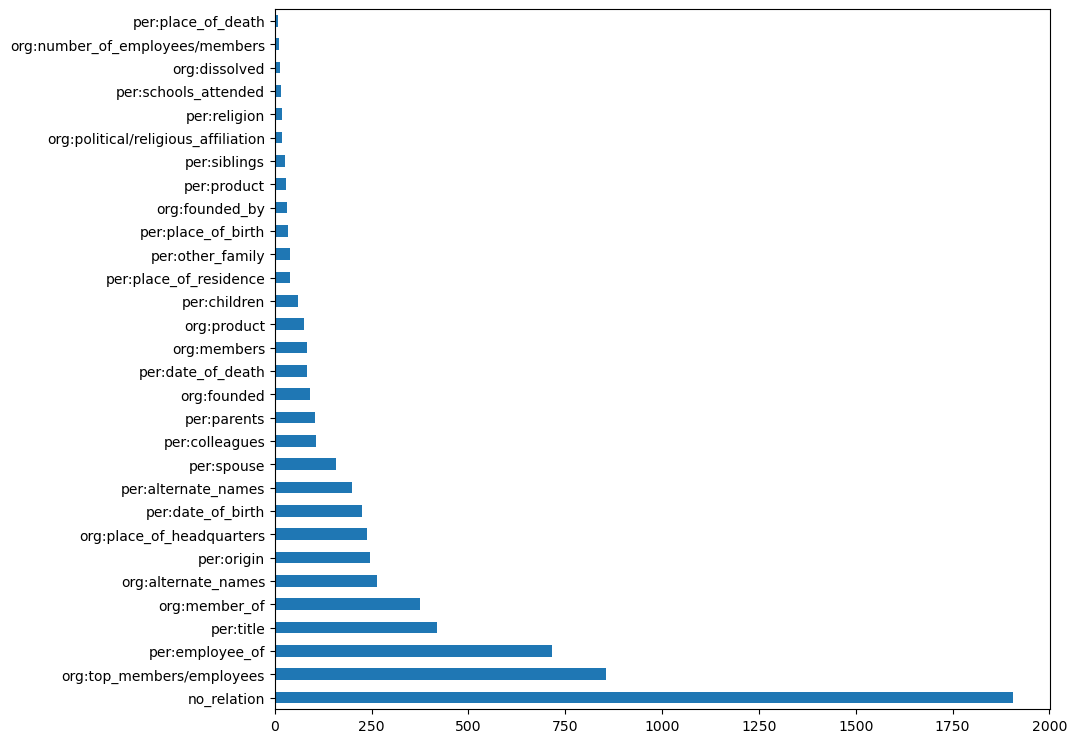

In [340]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(211)
ax1 = dev0['label'].value_counts().plot(kind='barh')

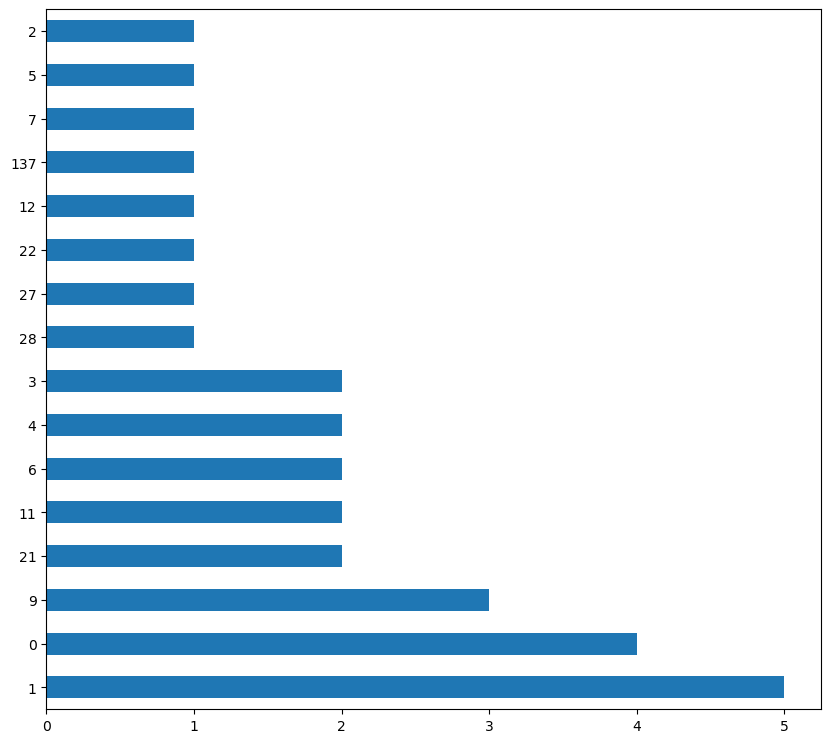

In [342]:
fig = plt.figure(figsize=(10,20))
ax1 = fig.add_subplot(211)
ax1 = pd.Series(labels_wrong).value_counts().plot(kind='barh')

In [343]:
dev0['label']

0       org:alternate_names      
1       org:top_members/employees
2       per:employee_of          
3       per:schools_attended     
4       per:spouse               
           ...                   
6489    no_relation              
6490    per:employee_of          
6491    per:other_family         
6492    per:colleagues           
6493    org:top_members/employees
Name: label, Length: 6494, dtype: object

In [341]:
pd.Series(labels_wrong)

no_relation                            137
org:top_members/employees              6  
per:employee_of                        22 
per:title                              7  
org:member_of                          27 
org:alternate_names                    9  
per:origin                             21 
org:place_of_headquarters              21 
per:date_of_birth                      0  
per:alternate_names                    4  
per:spouse                             2  
per:colleagues                         9  
per:parents                            9  
org:founded                            0  
org:members                            12 
per:date_of_death                      1  
org:product                            5  
per:children                           11 
per:place_of_residence                 28 
per:other_family                       11 
per:place_of_birth                     6  
org:founded_by                         1  
per:product                            3  
per:sibling

### Confusion matrix 그려보자

In [410]:
cm = confusion_matrix(dev0["label"], dev0["pred"])

In [411]:
cm_df = pd.DataFrame(cm,
                     index = labels, 
                     columns = labels)
cm_df

,no_relation,org:top_members/employees,per:employee_of,per:title,org:member_of,org:alternate_names,per:origin,org:place_of_headquarters,per:date_of_birth,per:alternate_names,...,per:place_of_birth,org:founded_by,per:product,per:siblings,org:political/religious_affiliation,per:religion,per:schools_attended,org:dissolved,org:number_of_employees/members,per:place_of_death
no_relation,1769,10,2,3,1,23,5,2,11,3,...,2,1,0,0,2,1,0,0,5,13
org:top_members/employees,3,255,0,0,0,1,4,0,0,0,...,0,0,0,0,0,0,0,0,0,0
per:employee_of,0,0,12,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
per:title,0,0,0,90,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
org:member_of,0,0,0,0,30,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
org:alternate_names,13,0,0,0,0,347,0,0,10,0,...,0,0,0,0,0,0,0,0,0,0
per:origin,9,1,0,0,0,1,72,0,1,0,...,0,0,0,0,0,0,0,0,0,0
org:place_of_headquarters,3,0,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
per:date_of_birth,9,0,0,0,0,6,5,0,218,0,...,0,0,0,0,0,0,0,0,0,0
per:alternate_names,0,0,0,0,0,0,1,0,0,18,...,0,0,0,0,0,0,0,0,0,0


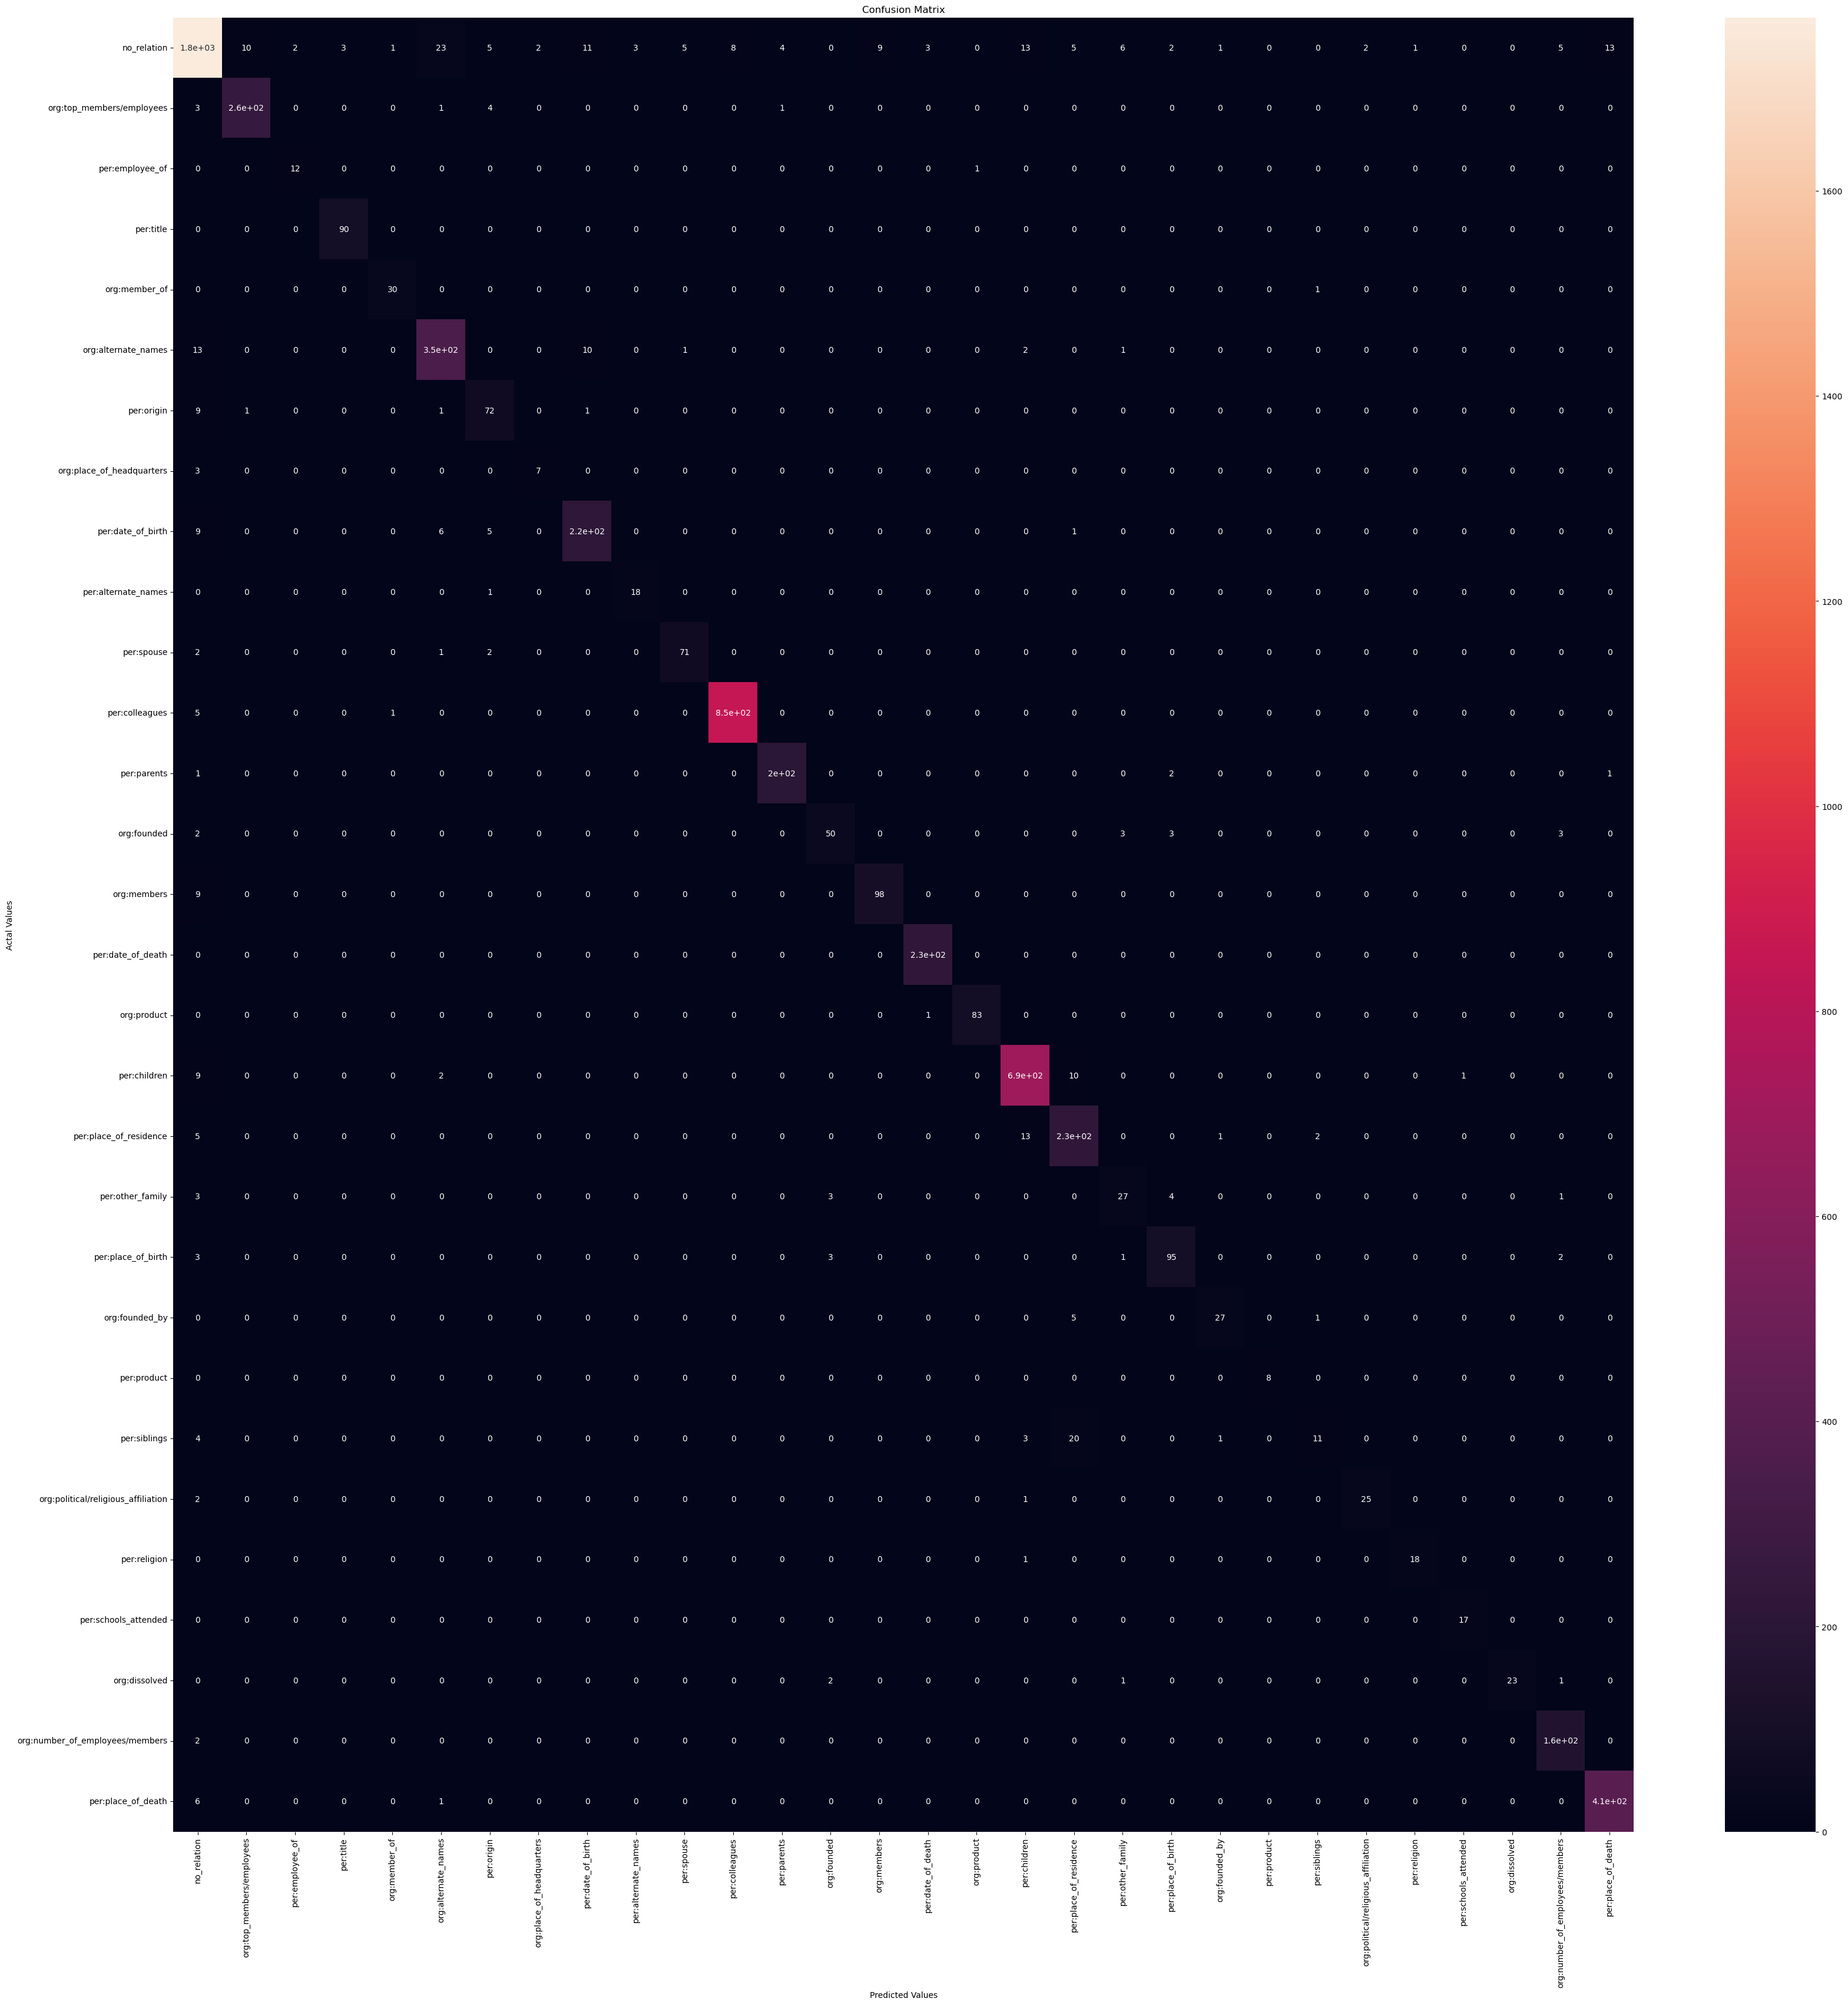

In [412]:
#Plotting the confusion matrix
plt.figure(figsize=(40,40))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()



In [413]:
## 조금 더 효과적으로 각 행의 값을 각 행의 총합으로 나눈 값으로 계산하면 어떨까? -> precision 차원
## 틀린 비율 알 수 있어서 좋을 것 같은데
import copy

cm_df_div_row_sum = copy.deepcopy(cm_df)

for i in range(30):
    cm_df_div_row_sum.iloc[i,:] = cm_df_div_row_sum.iloc[i,:]/sum(cm_df_div_row_sum.iloc[i,:])
cm_df_div_row_sum

,no_relation,org:top_members/employees,per:employee_of,per:title,org:member_of,org:alternate_names,per:origin,org:place_of_headquarters,per:date_of_birth,per:alternate_names,...,per:place_of_birth,org:founded_by,per:product,per:siblings,org:political/religious_affiliation,per:religion,per:schools_attended,org:dissolved,org:number_of_employees/members,per:place_of_death
no_relation,0.928122,0.005247,0.001049,0.001574,0.000525,0.012067,0.002623,0.001049,0.005771,0.001574,...,0.001049,0.000525,0.0,0.000000,0.001049,0.000525,0.000000,0.000000,0.002623,0.006821
org:top_members/employees,0.011364,0.965909,0.000000,0.000000,0.000000,0.003788,0.015152,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
per:employee_of,0.000000,0.000000,0.923077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
per:title,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
org:member_of,0.000000,0.000000,0.000000,0.000000,0.967742,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
org:alternate_names,0.034759,0.000000,0.000000,0.000000,0.000000,0.927807,0.000000,0.000000,0.026738,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
per:origin,0.107143,0.011905,0.000000,0.000000,0.000000,0.011905,0.857143,0.000000,0.011905,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
org:place_of_headquarters,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
per:date_of_birth,0.037657,0.000000,0.000000,0.000000,0.000000,0.025105,0.020921,0.000000,0.912134,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
per:alternate_names,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.947368,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [414]:
cm_df_div_row_sum

,no_relation,org:top_members/employees,per:employee_of,per:title,org:member_of,org:alternate_names,per:origin,org:place_of_headquarters,per:date_of_birth,per:alternate_names,...,per:place_of_birth,org:founded_by,per:product,per:siblings,org:political/religious_affiliation,per:religion,per:schools_attended,org:dissolved,org:number_of_employees/members,per:place_of_death
no_relation,0.928122,0.005247,0.001049,0.001574,0.000525,0.012067,0.002623,0.001049,0.005771,0.001574,...,0.001049,0.000525,0.0,0.000000,0.001049,0.000525,0.000000,0.000000,0.002623,0.006821
org:top_members/employees,0.011364,0.965909,0.000000,0.000000,0.000000,0.003788,0.015152,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
per:employee_of,0.000000,0.000000,0.923077,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
per:title,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
org:member_of,0.000000,0.000000,0.000000,0.000000,0.967742,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.032258,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
org:alternate_names,0.034759,0.000000,0.000000,0.000000,0.000000,0.927807,0.000000,0.000000,0.026738,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
per:origin,0.107143,0.011905,0.000000,0.000000,0.000000,0.011905,0.857143,0.000000,0.011905,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
org:place_of_headquarters,0.300000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.700000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
per:date_of_birth,0.037657,0.000000,0.000000,0.000000,0.000000,0.025105,0.020921,0.000000,0.912134,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
per:alternate_names,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.052632,0.000000,0.000000,0.947368,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


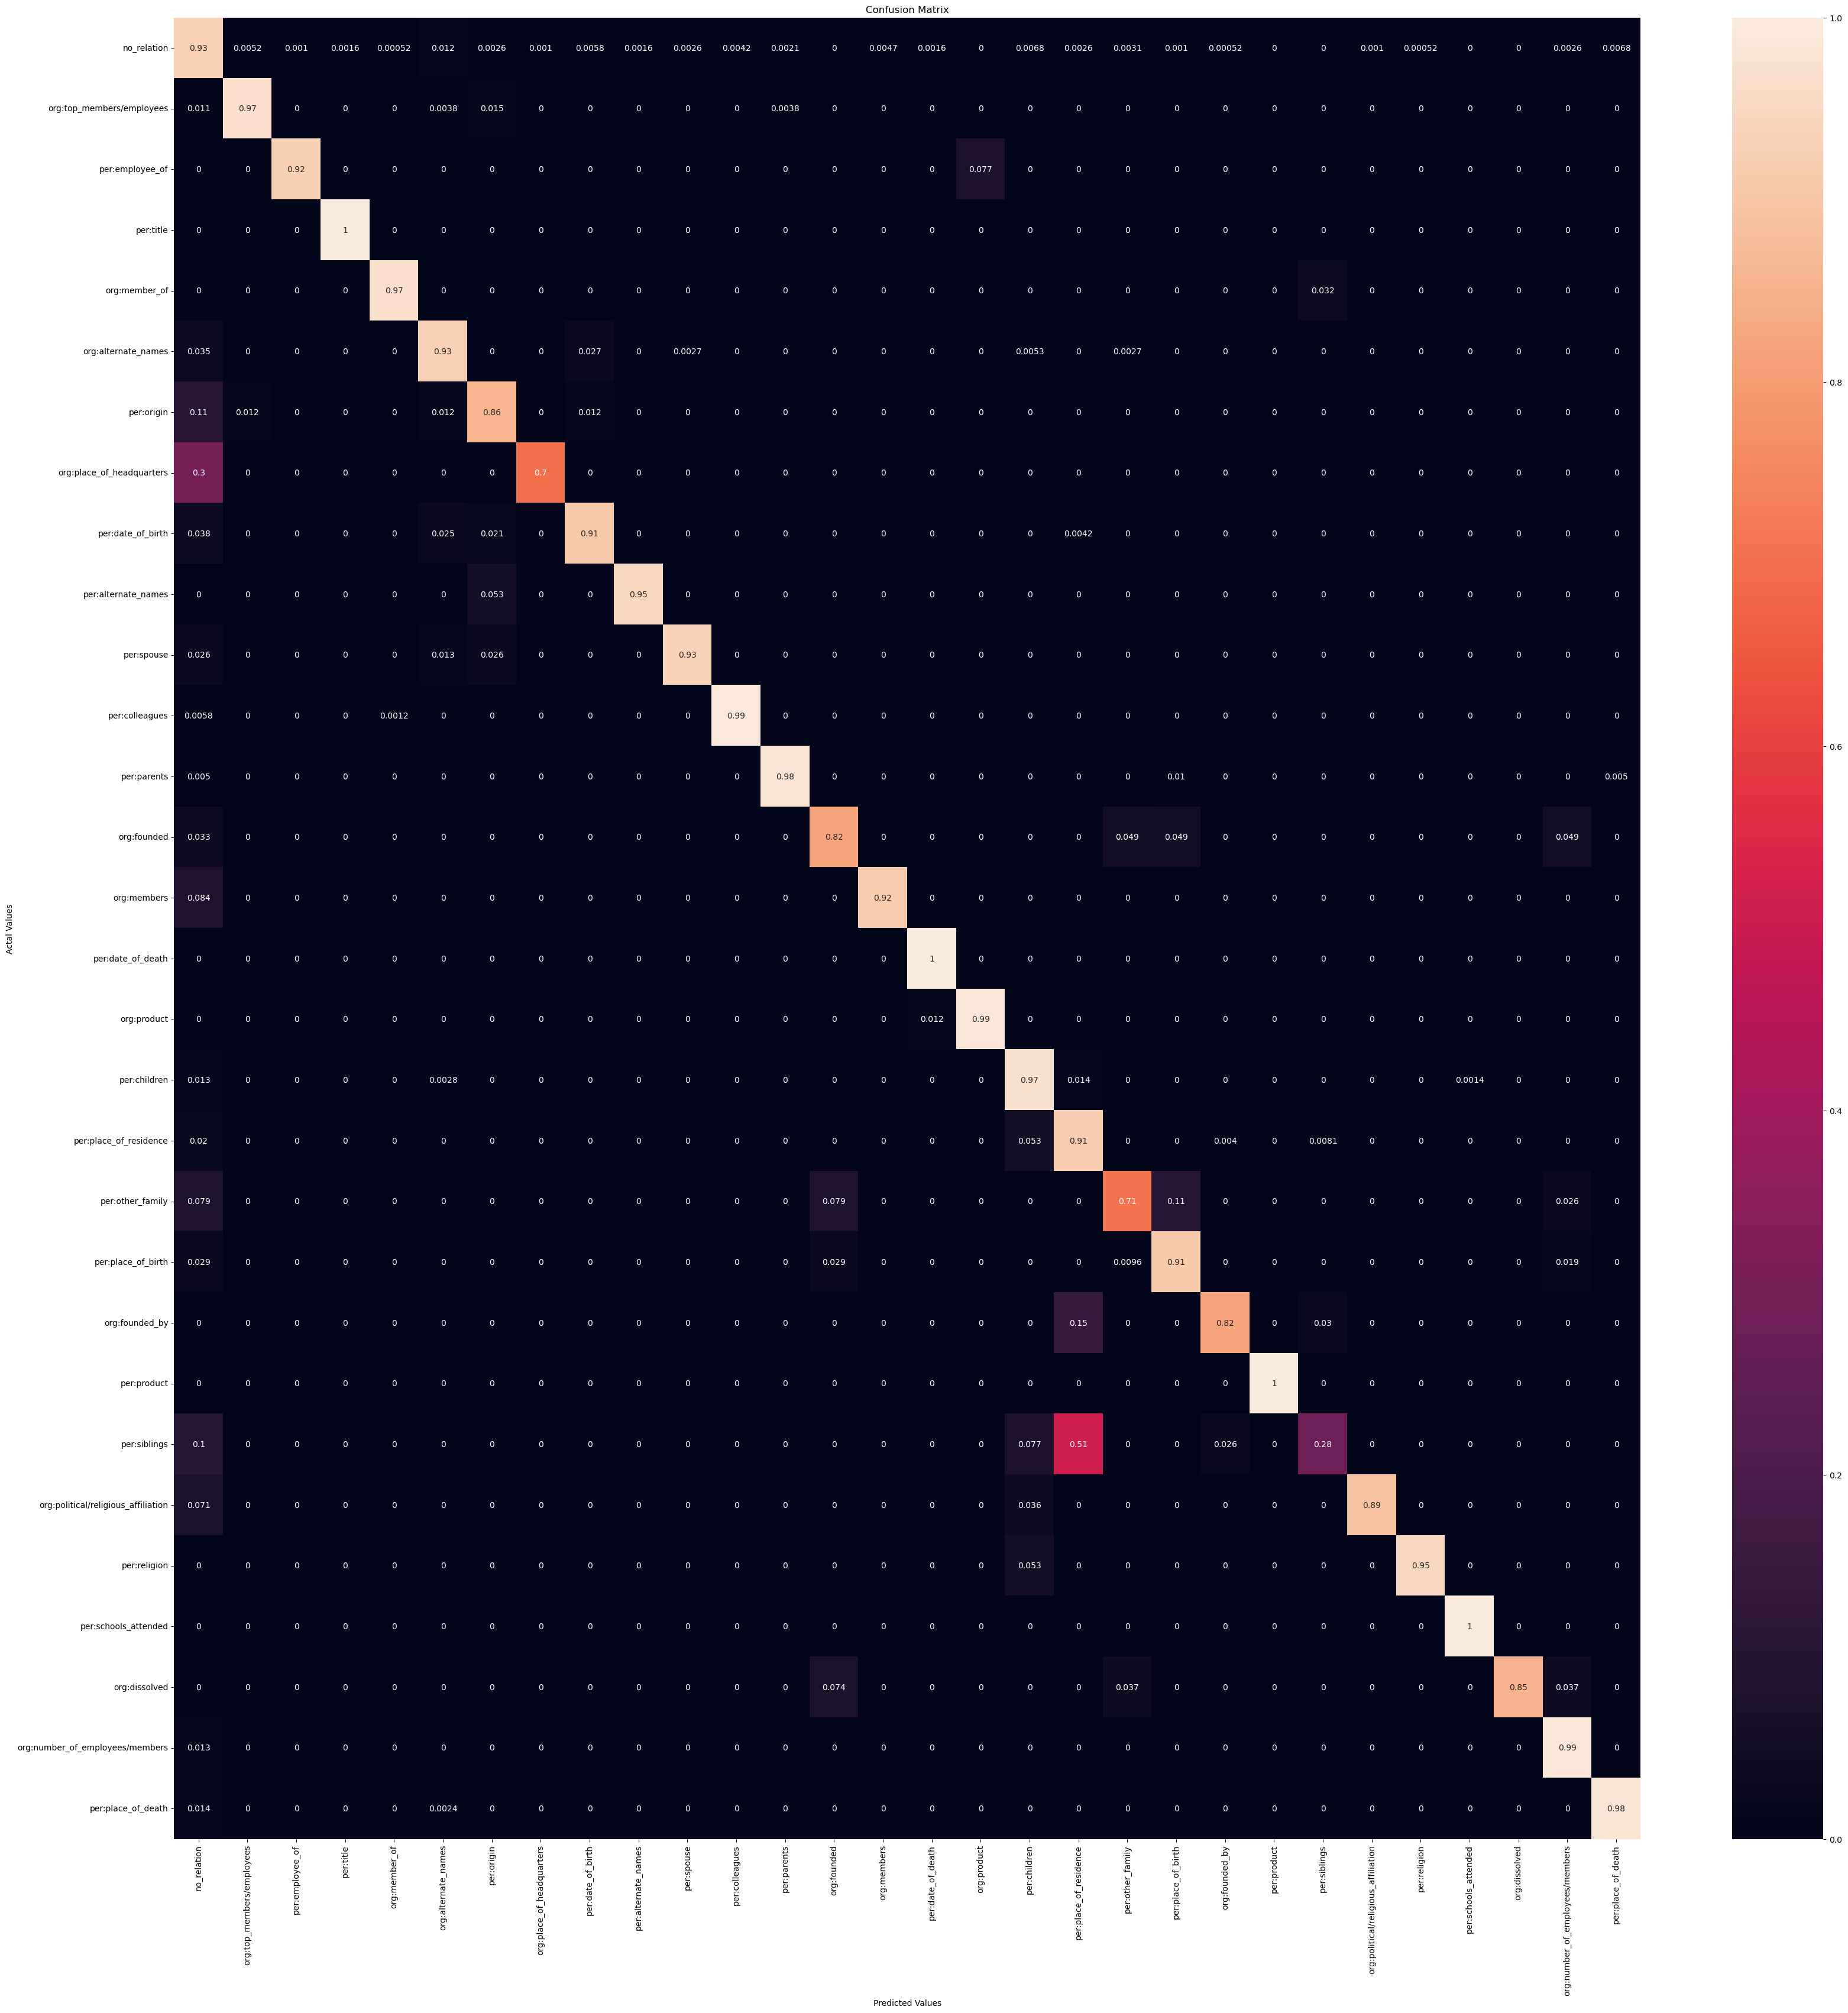

In [415]:
#Plotting the confusion matrix
plt.figure(figsize=(40,40))
sns.heatmap(cm_df_div_row_sum, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [416]:
## 조금 더 효과적으로 각 열의 값을 각 열의 총합으로 나눈 값으로 계산하면 어떨까? -> recall 차원
## 틀린 비율 알 수 있어서 좋을 것 같은데
cm_df_div_col_sum = copy.deepcopy(cm_df)

for i in range(30):
    cm_df_div_col_sum.iloc[:,i] = cm_df_div_col_sum.iloc[:,i]/sum(cm_df_div_col_sum.iloc[:,i])
cm_df_div_col_sum

,no_relation,org:top_members/employees,per:employee_of,per:title,org:member_of,org:alternate_names,per:origin,org:place_of_headquarters,per:date_of_birth,per:alternate_names,...,per:place_of_birth,org:founded_by,per:product,per:siblings,org:political/religious_affiliation,per:religion,per:schools_attended,org:dissolved,org:number_of_employees/members,per:place_of_death
no_relation,0.951587,0.037594,0.142857,0.032258,0.03125,0.060209,0.056180,0.222222,0.045833,0.142857,...,0.018868,0.033333,0.0,0.000000,0.074074,0.052632,0.000000,0.0,0.029586,0.030445
org:top_members/employees,0.001614,0.958647,0.000000,0.000000,0.00000,0.002618,0.044944,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
per:employee_of,0.000000,0.000000,0.857143,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
per:title,0.000000,0.000000,0.000000,0.967742,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
org:member_of,0.000000,0.000000,0.000000,0.000000,0.93750,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.066667,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
org:alternate_names,0.006993,0.000000,0.000000,0.000000,0.00000,0.908377,0.000000,0.000000,0.041667,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
per:origin,0.004841,0.003759,0.000000,0.000000,0.00000,0.002618,0.808989,0.000000,0.004167,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
org:place_of_headquarters,0.001614,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.777778,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
per:date_of_birth,0.004841,0.000000,0.000000,0.000000,0.00000,0.015707,0.056180,0.000000,0.908333,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000
per:alternate_names,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.011236,0.000000,0.000000,0.857143,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000


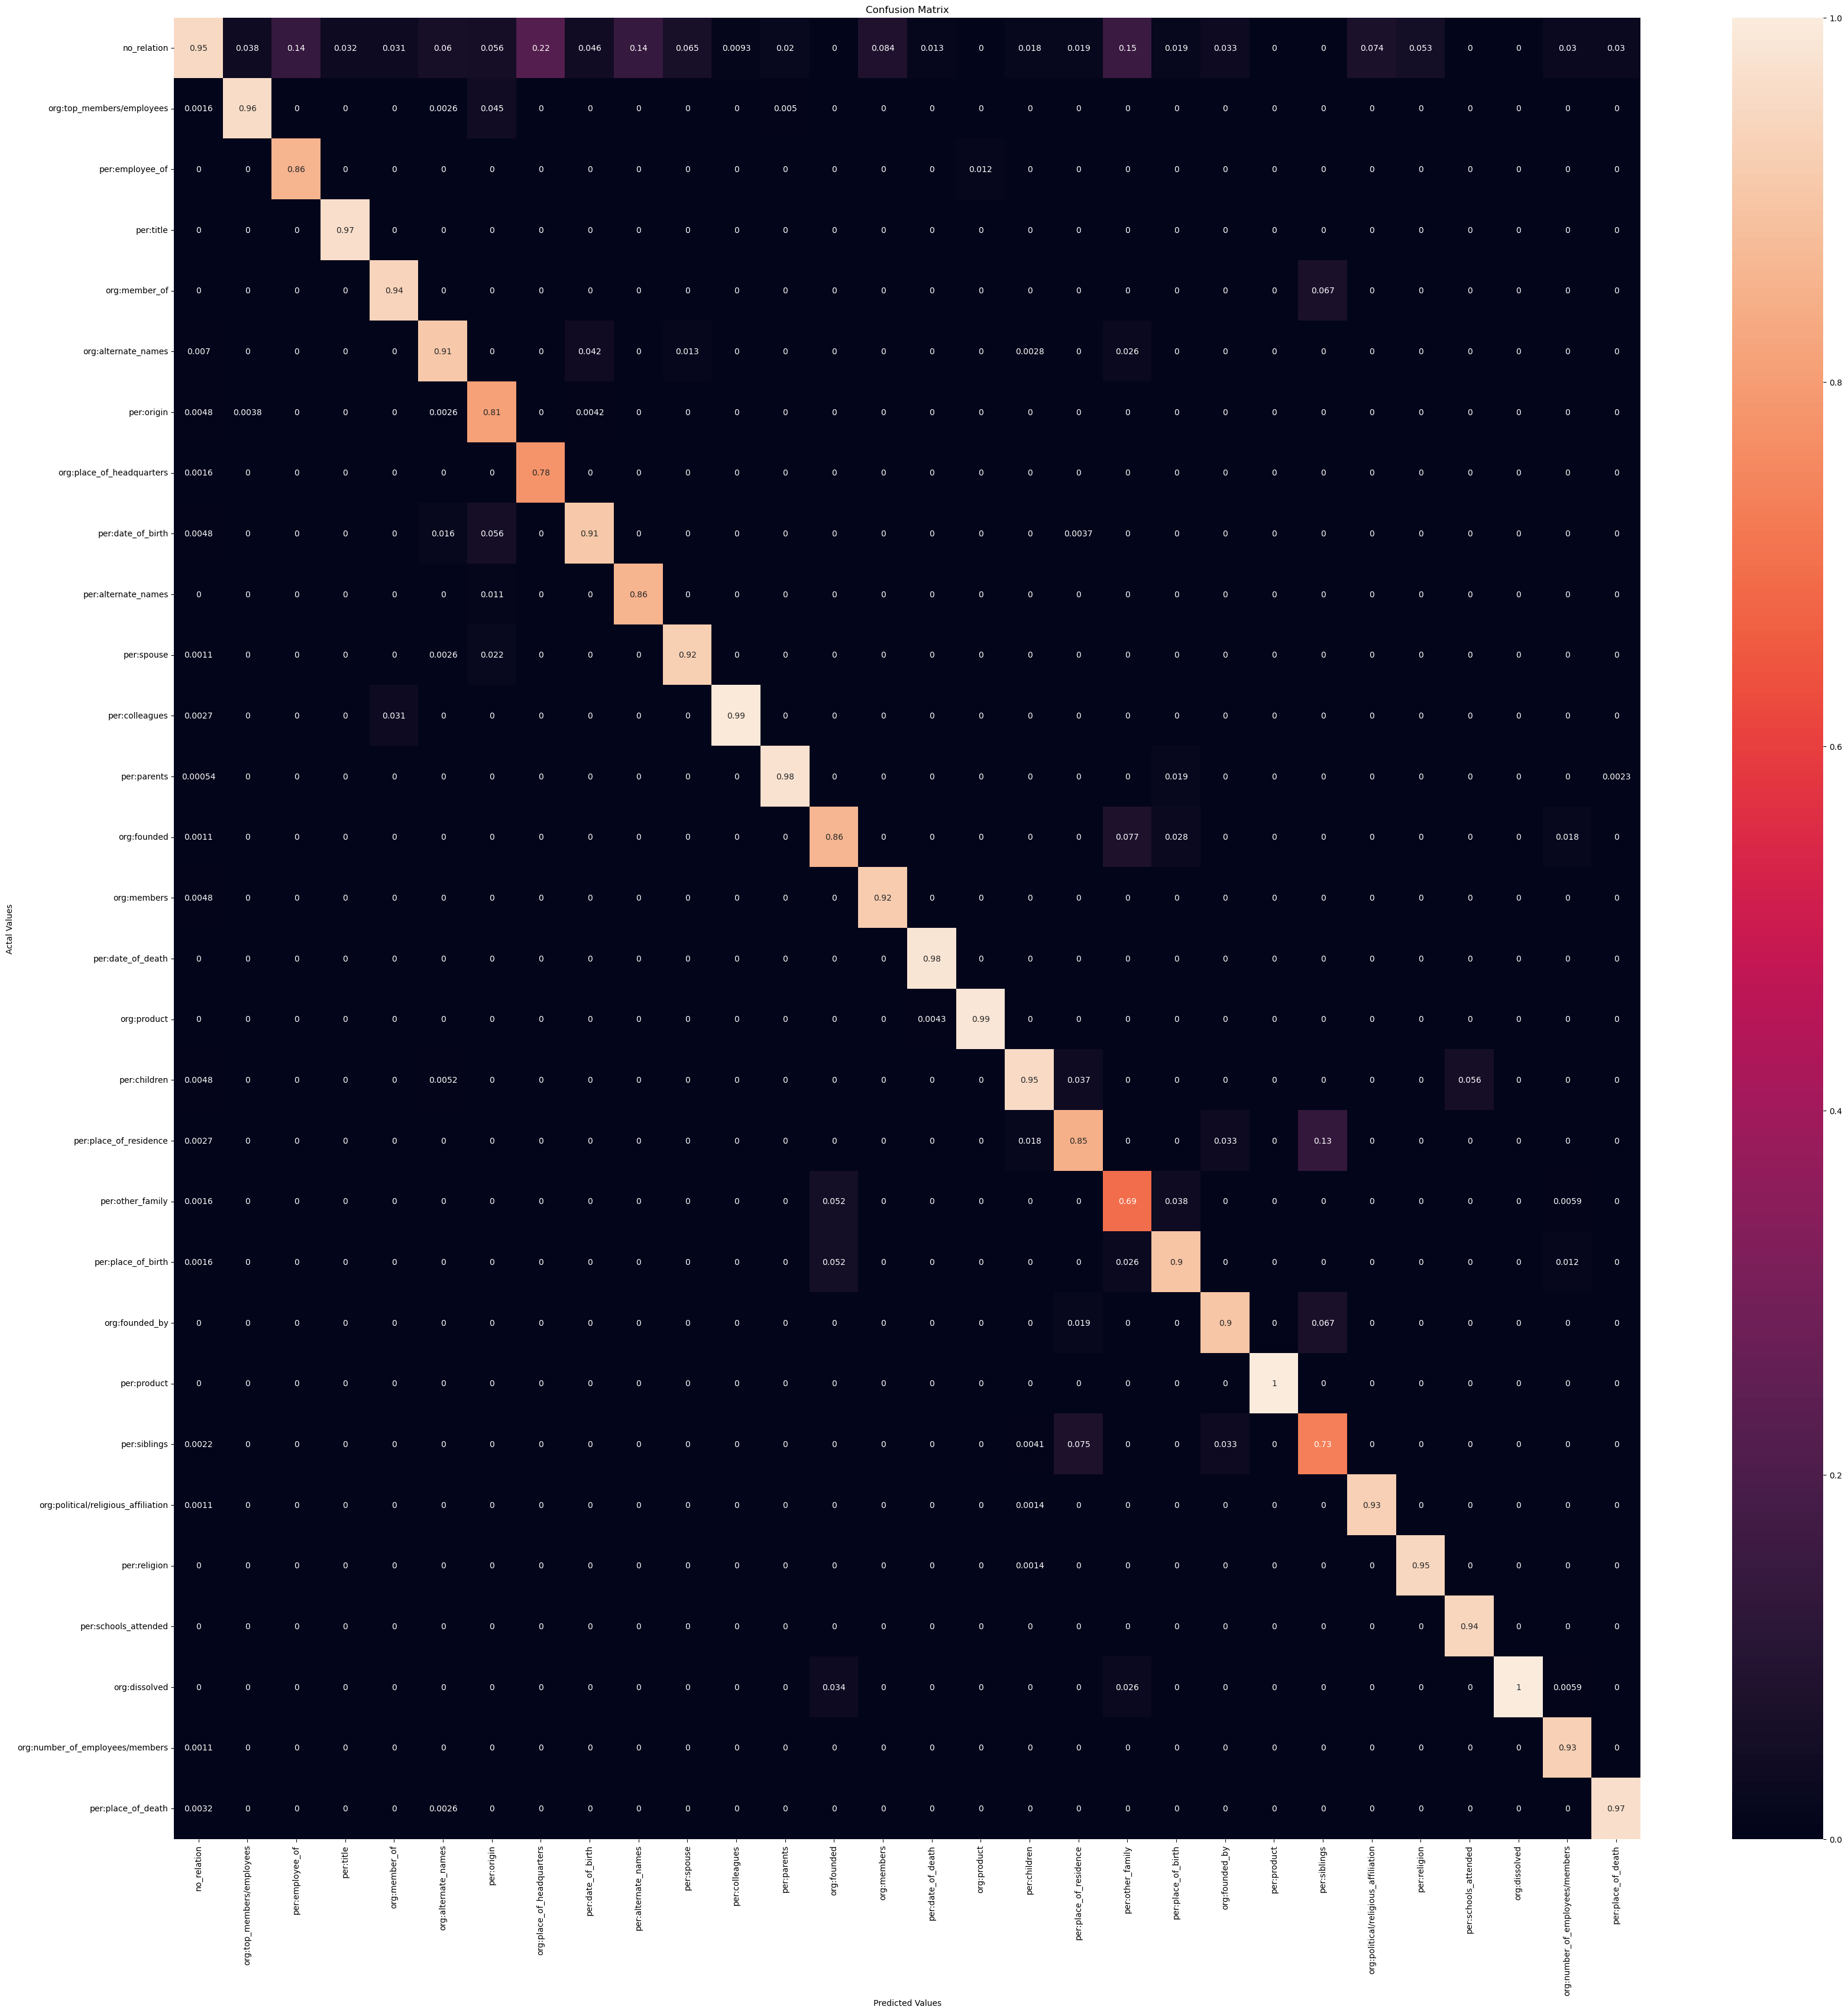

In [417]:
#Plotting the confusion matrix
plt.figure(figsize=(40,40))
sns.heatmap(cm_df_div_col_sum, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

# -----------------------------구분선---------------------------------------

In [267]:
for label in labels:
    print(f"{label}에 해당하는 pair_type들의 분포:\n ", globals()[f"label_{labels_id[label]}_df"]["pair_type"].value_counts(), "\n")  

no_relation에 해당하는 pair_type들의 분포:
  (ORG, ORG)    1958
(ORG, DAT)    1582
(PER, PER)    1399
(PER, POH)    1055
(PER, ORG)    741 
(ORG, POH)    725 
(ORG, LOC)    548 
(PER, DAT)    505 
(ORG, PER)    401 
(PER, LOC)    310 
(ORG, NOH)    192 
(PER, NOH)    118 
Name: pair_type, dtype: int64 

org:top_members/employees에 해당하는 pair_type들의 분포:
  (ORG, PER)    4195
(ORG, POH)    52  
(ORG, ORG)    22  
(ORG, LOC)    13  
(PER, PER)    1   
(ORG, NOH)    1   
Name: pair_type, dtype: int64 

per:employee_of에 해당하는 pair_type들의 분포:
  (PER, ORG)    2857
(PER, PER)    391 
(PER, LOC)    165 
(PER, POH)    135 
(PER, DAT)    19  
(PER, NOH)    6   
Name: pair_type, dtype: int64 

per:title에 해당하는 pair_type들의 분포:
  (PER, POH)    1845
(PER, ORG)    141 
(PER, LOC)    81  
(PER, NOH)    19  
(PER, PER)    14  
(PER, DAT)    3   
Name: pair_type, dtype: int64 

org:member_of에 해당하는 pair_type들의 분포:
  (ORG, ORG)    1320
(ORG, POH)    358 
(ORG, LOC)    173 
(ORG, NOH)    9   
(ORG, DAT)    5   
(ORG, PER

In [302]:
df[(df['label']=="org:top_members/employees") & (df["pair_type"]==("ORG", "NOH"))]

,id,sentence,subject_entity,object_entity,label,source,pair_type
11002,11002,한국해양대학교 제8대 도덕희 총장 취임식이 12월 2일 오후 2시 대학 대강당에서 열린다.,"{'word': '한국해양대학교', 'start_idx': 0, 'end_idx': 6, 'type': 'ORG'}","{'word': '도덕희', 'start_idx': 12, 'end_idx': 14, 'type': 'NOH'}",org:top_members/employees,wikitree,"(ORG, NOH)"


In [303]:
df[(df['label']=="org:top_members/employees") & (df["pair_type"]==("PER", "PER"))]

,id,sentence,subject_entity,object_entity,label,source,pair_type
14958,14958,그룹 2AM 출신 정진운 씨와 나인뮤지스 출신 경리가 열애를 인정한 가운데 두 사람이 듀엣곡을 작업하면서 인연을 맺게 됐다는 측근 증언이 전해졌다.,"{'word': '2AM', 'start_idx': 3, 'end_idx': 5, 'type': 'PER'}","{'word': '정진운', 'start_idx': 10, 'end_idx': 12, 'type': 'PER'}",org:top_members/employees,wikitree,"(PER, PER)"


In [304]:
df[(df['label']=="org:top_members/employees") & (df["pair_type"]==("ORG","LOC"))]

,id,sentence,subject_entity,object_entity,label,source,pair_type
4428,4428,"쾰른의 브루노(1130년 - 1101년 10월 6일)은 로마 가톨릭교회 성인이자 수도사제이며, 카르투시오 수도회의 창설자이다.","{'word': '로마 가톨릭교회', 'start_idx': 31, 'end_idx': 38, 'type': 'ORG'}","{'word': '쾰른의 브루노', 'start_idx': 0, 'end_idx': 6, 'type': 'LOC'}",org:top_members/employees,wikipedia,"(ORG, LOC)"
5955,5955,횡성 고씨 고구려 왕실종친회는 2015년 대한민국 통계청 인구조사에서 약 1만명 조사되었다.,"{'word': '고구려 왕실종친회', 'start_idx': 6, 'end_idx': 14, 'type': 'ORG'}","{'word': '횡성 고씨', 'start_idx': 0, 'end_idx': 4, 'type': 'LOC'}",org:top_members/employees,wikipedia,"(ORG, LOC)"
8297,8297,1945년 9월 호찌민은 하노이를 수도로 하여 베트남 민주 공화국(북베트남)의 독립을 선언하였다.,"{'word': '베트남', 'start_idx': 26, 'end_idx': 28, 'type': 'ORG'}","{'word': '호찌민', 'start_idx': 9, 'end_idx': 11, 'type': 'LOC'}",org:top_members/employees,wikipedia,"(ORG, LOC)"
10854,10854,"이 제의는 소위 대박을 내었고, 리버풀 FC의 악명높은 안필드 스피온 콥 스탠드의 영향을 받은 신규 팬들은 불로뉴 콥 (Kop of Boulogne KoB) 이라는 스탠드를 명명하였고, 그 결과 캐주얼 훌리건의 등장이라는 결과를 낳았다.","{'word': '리버풀 FC', 'start_idx': 18, 'end_idx': 23, 'type': 'ORG'}","{'word': '안필드', 'start_idx': 31, 'end_idx': 33, 'type': 'LOC'}",org:top_members/employees,wikipedia,"(ORG, LOC)"
16353,16353,"남해안남중권발전협의회(회장 권오봉 여수시장)가 주최하고 남해군(남해군수 장충남), 남해군 체육회가 주관하는 이번 행사는 영호남 9개 시군 생활체육 동호인 1,000여명이 참여했다.","{'word': '남해군', 'start_idx': 31, 'end_idx': 33, 'type': 'ORG'}","{'word': '장충남', 'start_idx': 40, 'end_idx': 42, 'type': 'LOC'}",org:top_members/employees,wikitree,"(ORG, LOC)"
18972,18972,여수시에 따르면 지난달 24일 꿈뜨락몰 컨벤션홀(중앙시장 2층)에서 열린 청년정책위원회(위원장 권오봉시장)에서 올해 추진할 청년정책 시행계획을 보고하고 위원들의 의견을 수렴하는 자리를 가졌다고 밝혔다.,"{'word': '여수시', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}","{'word': '권오봉', 'start_idx': 53, 'end_idx': 55, 'type': 'LOC'}",org:top_members/employees,wikitree,"(ORG, LOC)"
20592,20592,"1930년 호찌민이 결성한 베트남 공산당과 1941년 결성된 비엣민은 프랑스의 식민지였던 프랑스령 인도차이나의 독립을 위해 무장 투쟁을 하고 있었으며, 제2차 세계대전 기간에는 일본 제국의 점령군과 싸웠다.","{'word': '베트남', 'start_idx': 15, 'end_idx': 17, 'type': 'ORG'}","{'word': '호찌민', 'start_idx': 6, 'end_idx': 8, 'type': 'LOC'}",org:top_members/employees,wikipedia,"(ORG, LOC)"
20963,20963,"바오다이는 호찌민에 의해서 베트남 민주 공화국 정부의 최고 고문에 임명되었지만, 공식 외교 대표단의 일원으로서 방중시에 망명하여, 1946년 당시에 영국의 식민지인 홍콩에 망명했다.","{'word': '베트남', 'start_idx': 15, 'end_idx': 17, 'type': 'ORG'}","{'word': '호찌민', 'start_idx': 6, 'end_idx': 8, 'type': 'LOC'}",org:top_members/employees,wikipedia,"(ORG, LOC)"
21410,21410,"그러나 일제의 패망으로 그 직후에 베트남에서는 8월 혁명으로 1945년 8월 23일에 베트남 제정이 붕괴되어 바오다이는 보위에서 퇴위하였고, 호찌민(Hồ Chí Minh)이 베트남 과도 정부 총리로 임시 수반 체제를 성립하였으며 같은 해 9월 2일 호찌민이 베트남 민주 공화국의 독립을 선언하여 국가원수로 본격 취임하였고 같은 해 10월 2일 호찌민이 베트남 민주 공화국의 대통령으로 전격 취임하자 바오다이는 사실상 완전히 퇴진하였다.","{'word': '베트남', 'start_idx': 144, 'end_idx': 146, 'type': 'ORG'}","{'word': '호찌민', 'start_idx': 192, 'end_idx': 194, 'type': 'LOC'}",org:top_members/employees,wikipedia,"(ORG, LOC)"
22271,22271,"1950년 마오쩌둥의 중국과 스탈린의 소련은 호치민의 베트민을 공식적으로 인정했고, 중국으로 부터 지원을 받은 호치민의 베트민은 북부전선에서 대대적인 반격에 나선다.","{'word': '베트민', 'start_idx': 30, 'end_idx': 32, 'type': 'ORG'}","{'word': '호치민', 'start_idx': 25, 'end_idx': 27, 'type': 'LOC'}",org:top_members/employees,wikipedia,"(ORG, LOC)"


In [306]:
df[(df["pair_type"]==("PER", "NOH"))]

,id,sentence,subject_entity,object_entity,label,source,pair_type
109,109,"당시 김신영 씨는 ""현재 48kg이다. 골반은 조금 더 작아졌지만 크게 달라진 건 없다""며 ""애니메이션 '인크레더블' 몸매""라고 설명했다.","{'word': '김신영', 'start_idx': 3, 'end_idx': 5, 'type': 'PER'}","{'word': '48kg', 'start_idx': 14, 'end_idx': 17, 'type': 'NOH'}",no_relation,wikitree,"(PER, NOH)"
541,541,"소식을 접한 국내 야구팬들은 ""충격이 커 보인다. 아쉽지 않았으면 보통 ‘굿바이 류’라는 댓글이 달릴 텐데"", ""4년에 8000만달러면 그렇게 비싸지 않아서 다저스 팬들이 아쉽겠다"", ""FA 시장에서 수준급 선발 투수들이 거의 다 진로를 결정한 상황이라, 류현진만한 투수를 얻기도 쉽지 않다는 걸 그들도 아는 것"" 등의 반응을 보이고 있다.","{'word': '류현진', 'start_idx': 143, 'end_idx': 145, 'type': 'PER'}","{'word': '8000만달러', 'start_idx': 67, 'end_idx': 73, 'type': 'NOH'}",no_relation,wikitree,"(PER, NOH)"
663,663,안소미 씨는 지난 2009년 KBS 24기 공채 개그맨으로 데뷔했다.,"{'word': '안소미', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}","{'word': 'KBS 24기 공채 개그맨', 'start_idx': 16, 'end_idx': 29, 'type': 'NOH'}",per:title,wikitree,"(PER, NOH)"
977,977,"정진석(鄭鎭碩, 1960년 9월 4일 ~)은 대한민국의 정치인으로, 제16·17·18·20·21대 국회의원이다.","{'word': '정진석', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}","{'word': '16·17·18·20', 'start_idx': 39, 'end_idx': 49, 'type': 'NOH'}",no_relation,wikipedia,"(PER, NOH)"
1020,1020,"ESPN 제프 파산 기자 등은 23일(한국시간) SNS를 통해 ""류현진이 토론토와 4년 총액 8000만달러(약929억7600만원)에 계약했다""고 밝혔다.","{'word': '류현진', 'start_idx': 36, 'end_idx': 38, 'type': 'PER'}","{'word': '8000만달러', 'start_idx': 52, 'end_idx': 58, 'type': 'NOH'}",no_relation,wikitree,"(PER, NOH)"
...,...,...,...,...,...,...,...
31831,31831,"1차전에서는 기타칸토 지역 고교 야구계의 에이스였던 스즈키 다카마사(1972년 드래프트 1순위로 주니치 드래곤스에 입단), 에가와 스구루와 함께 ‘속구 투수 3인방’ 중의 한 명인 이시다 마코토(1972년 드래프트 1순위로 한큐 브레이브스에 입단)가 소속된 아시카가 공업고등학교와 맞대결을 펼쳐 7회까지 양팀은 점수를 얻지 못하는 등 0대 0으로 접전했는데 8회에 사쿠신가쿠인이 선취 2점을 얻으면서 이것을 에가와가 끝까지 지킨 끝에 승리 투수가 되었다.","{'word': '에가와 스구루', 'start_idx': 69, 'end_idx': 75, 'type': 'PER'}","{'word': '1순위', 'start_idx': 120, 'end_idx': 122, 'type': 'NOH'}",no_relation,wikipedia,"(PER, NOH)"
32102,32102,"1968년 가을에 있은 프로 야구 드래프트 회의에서 한큐 브레이브스부터 7순위 지명을 받았는데 그 해의 드래프트에서는 ‘역사상 전례없는 풍작 드래프트’라고 표현할 정도로 화제가 되었는데 그 외에도 한큐는 1순위에 야마다 히사시, 2순위는 마쓰시타 전기의 동료였던 가토 히데지가 있었다.","{'word': '야마다 히사시', 'start_idx': 119, 'end_idx': 125, 'type': 'PER'}","{'word': '1순위', 'start_idx': 114, 'end_idx': 116, 'type': 'NOH'}",no_relation,wikipedia,"(PER, NOH)"
32227,32227,노무현은 1946년 9월 1일에 경상남도 김해에서 아버지 노판석과 어머니 이순례 사이에서 3남 2녀 중 막내로 태어났다.,"{'word': '노무현', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}","{'word': '3남 2녀 중 막내', 'start_idx': 50, 'end_idx': 59, 'type': 'NOH'}",no_relation,wikipedia,"(PER, NOH)"
32228,32228,"정청래(鄭淸來, 1965년 4월 18일 -)는 대한민국의 운동권 출신 정치인으로, 제17·19·21대 국회의원이다.","{'word': '정청래', 'start_idx': 0, 'end_idx': 2, 'type': 'PER'}","{'word': '제17·19·21대', 'start_idx': 46, 'end_idx': 55, 'type': 'NOH'}",no_relation,wikipedia,"(PER, NOH)"


In [307]:
df[(df["pair_type"]==("ORG", "NOH"))]

,id,sentence,subject_entity,object_entity,label,source,pair_type
72,72,"냉전 동안 독일 연방군은 NATO의 서유럽 방위의 주력군이 되었으며 전군을 통틀어 49만 5,000명의 병력과 17만명의 군무원을 거느리고 있었다.","{'word': '독일 연방군', 'start_idx': 6, 'end_idx': 11, 'type': 'ORG'}","{'word': '49만 5,000명', 'start_idx': 46, 'end_idx': 55, 'type': 'NOH'}",org:number_of_employees/members,wikipedia,"(ORG, NOH)"
107,107,"고양시청 종합상황실에서는 연휴기간동안 09:00 ~ 18:00까지 민원콜센터(031-909-9000)와 교통·버스 종합상황실(버스:031-8075-2017/교통:1577-0961)을 운영하고, 재난상황실(031-8075-2119)은 24시간 가동한다.","{'word': '고양시', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}","{'word': '031-909-9000', 'start_idx': 43, 'end_idx': 54, 'type': 'NOH'}",no_relation,wikitree,"(ORG, NOH)"
192,192,"1992년에 JSL 1부, 2부 총 28개팀 중 J리그에 참가하지 않겠다고 한 18팀과 전국 지역 리그 결승에 진출한 오사카 가스와 세이노 운수를 넣은 20개팀으로 시작했다.","{'word': 'J리그', 'start_idx': 27, 'end_idx': 29, 'type': 'ORG'}","{'word': '18팀', 'start_idx': 44, 'end_idx': 46, 'type': 'NOH'}",no_relation,wikipedia,"(ORG, NOH)"
194,194,"(해멀스는 8이닝 1실점을 기록하지만 디키의 호투 때문에 패가 된다). 2011년 1월 31일에는 뉴욕 메츠와 총액 780만 달러에 2년 계약(2013년에 500만 달러 구단 옵션 포함)을 맺으며, 시즌에서는 208.2이닝을 던지며 처음으로 200이닝을 돌파한다.","{'word': '뉴욕 메츠', 'start_idx': 55, 'end_idx': 59, 'type': 'ORG'}","{'word': '500만', 'start_idx': 87, 'end_idx': 90, 'type': 'NOH'}",no_relation,wikipedia,"(ORG, NOH)"
205,205,"결국, 대한민국 정부의 반대에도 불구하고 주한미군은 약 500명의 군사고문단만 남기고 마지막 남아 있던 부대가 1949년 6월 29일 철수하였다.","{'word': '군사고문단', 'start_idx': 37, 'end_idx': 41, 'type': 'ORG'}","{'word': '500명', 'start_idx': 31, 'end_idx': 34, 'type': 'NOH'}",org:number_of_employees/members,wikipedia,"(ORG, NOH)"
...,...,...,...,...,...,...,...
31970,31970,이 결승전은 유럽대항전 결승 최초로 두 포르투갈 팀 간의 대결 (FC 포르투와 SC 브라가)이었다. 라다멜 팔카오는 위르겐 클린스만의 전 기록을 경신 (예선 제외)하고 14경기 17골의 기록을 세웠다.,"{'word': '브라가', 'start_idx': 47, 'end_idx': 49, 'type': 'ORG'}","{'word': '포르투갈', 'start_idx': 22, 'end_idx': 25, 'type': 'NOH'}",org:place_of_headquarters,wikipedia,"(ORG, NOH)"
32329,32329,"순천시에서 관리하고 있는 13개 사회보장급여(국민기초, 한부모, 장애연금, 기초연금 등)가구는 7월말 기준 47415세대로 통합관리팀 8명이 관리한다.","{'word': '순천시', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}","{'word': '13개', 'start_idx': 14, 'end_idx': 16, 'type': 'NOH'}",no_relation,wikitree,"(ORG, NOH)"
32356,32356,"강화군노인복지관이 이달 16일 농촌마을지킴이사업을 시작으로 27일까지 2주간 8회에 걸쳐 노인사회활동지원사업 12개 사업단 참여자 2,500여 명을 대상으로 활동교육 및 간담회를 갖는다.","{'word': '강화군', 'start_idx': 0, 'end_idx': 2, 'type': 'ORG'}","{'word': '12개', 'start_idx': 61, 'end_idx': 63, 'type': 'NOH'}",no_relation,wikitree,"(ORG, NOH)"
32448,32448,전북 14개 지자체가 공개한 자료에 따르면 ▲익산시가 지난 5년간 32억6540만원을 집행해 전북 14개 시군 중 가장 많은 규모의 청소년 체육예산을 지원했다.,"{'word': '익산시', 'start_idx': 25, 'end_idx': 27, 'type': 'ORG'}","{'word': '14개', 'start_idx': 3, 'end_idx': 5, 'type': 'NOH'}",no_relation,wikitree,"(ORG, NOH)"


# RECENT

In [95]:
import pandas as pd

In [96]:
df1 = pd.read_csv('./submission_final.csv')
df2 = pd.read_csv('./submission_final2.csv')

df = pd.concat([df1, df2], axis = 0)
df.sort_values(by='id', inplace=True)

In [97]:
df.shape

(7765, 3)

In [102]:
df.to_csv("./submission_final_recent.csv")

In [98]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
import sklearn
def klue_re_micro_f1(preds, labels):
    """KLUE-RE micro f1 (except no_relation)"""
    label_list = ['no_relation', 'org:top_members/employees', 'org:members',
       'org:product', 'per:title', 'org:alternate_names',
       'per:employee_of', 'org:place_of_headquarters', 'per:product',
       'org:number_of_employees/members', 'per:children',
       'per:place_of_residence', 'per:alternate_names',
       'per:other_family', 'per:colleagues', 'per:origin', 'per:siblings',
       'per:spouse', 'org:founded', 'org:political/religious_affiliation',
       'org:member_of', 'per:parents', 'org:dissolved',
       'per:schools_attended', 'per:date_of_death', 'per:date_of_birth',
       'per:place_of_birth', 'per:place_of_death', 'org:founded_by',
       'per:religion']
    no_relation_label_idx = label_list.index("no_relation")
    label_indices = list(range(len(label_list)))
    label_indices.remove(no_relation_label_idx)
    return sklearn.metrics.f1_score(labels, preds, average="micro", labels=label_indices) * 100.0

In [99]:
df_test = pd.read_csv('./data/test_with_label.csv')
l_dic = {'no_relation': 0, 'org:top_members/employees': 1, 'org:members': 2, 'org:product': 3, 'per:title': 4, 'org:alternate_names': 5, 'per:employee_of': 6, 'org:place_of_headquarters': 7, 'per:product': 8, 'org:number_of_employees/members': 9, 'per:children': 10, 
         'per:place_of_residence': 11, 'per:alternate_names': 12, 'per:other_family': 13, 'per:colleagues': 14, 'per:origin': 15, 'per:siblings': 16, 'per:spouse': 17, 'org:founded': 18, 'org:political/religious_affiliation': 19, 'org:member_of': 20, 
         'per:parents': 21, 'org:dissolved': 22, 'per:schools_attended': 23, 'per:date_of_death': 24, 'per:date_of_birth': 25, 'per:place_of_birth': 26, 'per:place_of_death': 27, 'org:founded_by': 28, 'per:religion': 29}

true = list(df_test['label'])
pred = list(df['pred_label'])

true = [l_dic[label] for label in true]
pred = [l_dic[label] for label in pred]

In [100]:
klue_re_micro_f1(pred, true)

50.89682116853134

In [101]:
np.sum(np.array(pred) == np.array(true))

5328

# ---------------------

In [7]:
# train 데이터 불러오기
df = pd.read_csv('data/train.csv')
df.head()

,id,sentence,subject_entity,object_entity,label,source
0,0,〈Something〉는 조지 해리슨이 쓰고 비틀즈가 1969년 앨범 《Abbey Road》에 담은 노래다.,"{'word': '비틀즈', 'start_idx': 24, 'end_idx': 26, 'type': 'ORG'}","{'word': '조지 해리슨', 'start_idx': 13, 'end_idx': 18, 'type': 'PER'}",no_relation,wikipedia
1,1,호남이 기반인 바른미래당·대안신당·민주평화당이 우여곡절 끝에 합당해 민생당(가칭)으로 재탄생한다.,"{'word': '민주평화당', 'start_idx': 19, 'end_idx': 23, 'type': 'ORG'}","{'word': '대안신당', 'start_idx': 14, 'end_idx': 17, 'type': 'ORG'}",no_relation,wikitree
2,2,K리그2에서 성적 1위를 달리고 있는 광주FC는 지난 26일 한국프로축구연맹으로부터 관중 유치 성과와 마케팅 성과를 인정받아 ‘풀 스타디움상’과 ‘플러스 스타디움상’을 수상했다.,"{'word': '광주FC', 'start_idx': 21, 'end_idx': 24, 'type': 'ORG'}","{'word': '한국프로축구연맹', 'start_idx': 34, 'end_idx': 41, 'type': 'ORG'}",org:member_of,wikitree
3,3,균일가 생활용품점 (주)아성다이소(대표 박정부)는 코로나19 바이러스로 어려움을 겪고 있는 대구광역시에 행복박스를 전달했다고 10일 밝혔다.,"{'word': '아성다이소', 'start_idx': 13, 'end_idx': 17, 'type': 'ORG'}","{'word': '박정부', 'start_idx': 22, 'end_idx': 24, 'type': 'PER'}",org:top_members/employees,wikitree
4,4,1967년 프로 야구 드래프트 1순위로 요미우리 자이언츠에게 입단하면서 등번호는 8번으로 배정되었다.,"{'word': '요미우리 자이언츠', 'start_idx': 22, 'end_idx': 30, 'type': 'ORG'}","{'word': '1967', 'start_idx': 0, 'end_idx': 3, 'type': 'DAT'}",no_relation,wikipedia


In [8]:
for i in range(df.shape[0]):
    if 'number_of' in df.iloc[i]['label']:
        print(df.iloc[i])

id                72                                                                                
sentence          냉전 동안 독일 연방군은 NATO의 서유럽 방위의 주력군이 되었으며 전군을 통틀어 49만 5,000명의 병력과 17만명의 군무원을 거느리고 있었다.
subject_entity    {'word': '독일 연방군', 'start_idx': 6, 'end_idx': 11, 'type': 'ORG'}                  
object_entity     {'word': '49만 5,000명', 'start_idx': 46, 'end_idx': 55, 'type': 'NOH'}             
label             org:number_of_employees/members                                                   
source            wikipedia                                                                         
Name: 72, dtype: object
id                205                                                                              
sentence          결국, 대한민국 정부의 반대에도 불구하고 주한미군은 약 500명의 군사고문단만 남기고 마지막 남아 있던 부대가 1949년 6월 29일 철수하였다.
subject_entity    {'word': '군사고문단', 'start_idx': 37, 'end_idx': 41, 'type': 'ORG'}                 
object_entity     {'word': '500명', 'start_idx': 31, 'end_idx': 34, 'ty

id                14313                                                                                                   
sentence          한편 광주광역시 서구청에서 주관한 이번 박람회는 사회복지시설과 18개동 사회보장협의체 등이 홍보부스를 운영하며 시민들이 복지·의료사업의 모든 것을 직접 체험해볼 수 있는 기회를 마련했다.
subject_entity    {'word': '광주광역시 서구', 'start_idx': 3, 'end_idx': 10, 'type': 'ORG'}                                      
object_entity     {'word': '18개', 'start_idx': 35, 'end_idx': 37, 'type': 'NOH'}                                          
label             org:number_of_employees/members                                                                         
source            wikitree                                                                                                
Name: 14313, dtype: object
id                14440                                                                                               
sentence          이번 계약에 따라 차바이오F&C는 오는 12월부터 러시아 및 독립국가연합(CIS) 11개국의 백화점, 병·의원, 화장품 전문점에서 ‘에버셀’ 브랜드 제품의 판매에 들어갈 예정이

id                26266                                                                                      
sentence          또한 유럽 축구 연맹은 총 55개국 중에서 FIFA가 주관하는 월드컵에서 본선 진출 티켓이 13장이 배정되어 있으므로 남미 다음으로 본선 진출 비율이 높은 편이다.
subject_entity    {'word': '유럽 축구 연맹', 'start_idx': 3, 'end_idx': 10, 'type': 'ORG'}                         
object_entity     {'word': '55개국', 'start_idx': 15, 'end_idx': 18, 'type': 'NOH'}                            
label             org:number_of_employees/members                                                            
source            wikipedia                                                                                  
Name: 26266, dtype: object
id                27070                                                                                                                                        
sentence          보헤미아 전선의 24만 1000명의 오스트리아군을 이끌고 있던 사령관 루트비히 아우구스트 리터 폰 베네데크 장군은 갓 임명된 장군이라 전선의 지형을 잘 모를 뿐만 아니라 오스트리아군은 전장식 소총에다 총검 돌격전술에만 의존하여 구시대적인 전술

In [10]:

for i in range(300):
    if ' ' in df.iloc[i]['subject_entity']:
        print(df.iloc[i])

Unnamed: 0        0                                                                    
id                0                                                                    
sentence          지난 15일 MBC '탐사기획 스트레이트'가 이 사실을 보도했다.                                 
subject_entity    {'word': 'MBC', 'start_idx': 7, 'end_idx': 9, 'type': 'ORG'}         
object_entity     {'word': '탐사기획 스트레이트', 'start_idx': 12, 'end_idx': 21, 'type': 'ORG'}
label             org:members                                                          
source            wikitree                                                             
Name: 0, dtype: object
Unnamed: 0        1                                                                                                
id                1                                                                                                
sentence          사랑스러운 ‘프린세스 프링’의 이름은 봄의 공주님: Princess(s)Pring이란 뜻으로 탄생, 부활, 청춘 등 여러 가지 의미를 담아 생일왕국의 공주님의 이름이 되었다.
subject_entit